# The Advantages of Vector Autoregression Over Independent Component Modelling (A Study on US Macroeconomic Data)

**Author:** Matthew Seguin

## Introduction

Economies are an essential part of any nation. They are what determine a nation's access to goods and services. Without a strong economy the population struggles. There has been much work done to measure the strength of an economy. One of the most popular ways to measure the strength of an economy is through the use of macroeconomic indicators. Some examples of macroeconomic indicators include GDP, unemployment rate, inflation rate, and interest rates. The indicators I will be using in this project are the following:

- Money Supply (M2)
- Consumer Price Index (CPI)
- Producer Price Index (PPI)

The money supply is the total amount of money in circulation or in existence in a country. The consumer price index is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. The producer price index is a measure of the average change over time in the selling prices received by domestic producers for their output. These three indicators are important because they can help us understand how the economy is performing and how it may perform in the future. Additionally, they are all interrelated. For example, an increase in the money supply puts more money in the hands of the population while the demand for goods and services stays the same. This can lead to an increase in the consumer price index and subsequently increase in the producer price index. This interrelation is what makes vector autoregression (VAR) a useful tool for modeling these indicators. VAR is a statistical model similar to Autoregression that attempts to predict future points of a time series based on the past points, the key distinction here is that VAR uses vectors (with possible dimension greater than 1) as the observations instead of numbers. The question then arises: is VAR better than fitting a model for each component of a multivariate time series (i.e. independent component modeling)?

The goal of this project is to assess the performance of vector autoregressive models (VAR) in comparison to fitting independent ARMA models for each component of a multivariate time series. I will implement VAR from scratch and compare it with the predicitons from the independent modeling for each component time series. The data I will use in this project comes from three monthly datasets on FRED:

- Money Supply: https://fred.stlouisfed.org/series/M2REAL
- Consumer Price Index: https://fred.stlouisfed.org/series/CPIAUCSL
- Producer Price Index: https://fred.stlouisfed.org/series/PPIACO

In order to assess the performance of VAR in a usual setting I will disregard the data starting from 2020 which is when the COVID-19 pandemic started. The reason for this is because COVID caused a huge unexpected impact on the US economy so any predictions will be very far from the true results. So I will restrict the analysis in this project to working with data that is more predictable to compare VAR with independent component modeling. The data I will use is from 1959 to 2019 with a total of 732 observations. I will reserve a little over 15% of the data for testing (125 points) and a little under 85% for training (607 points).

## Background

### Stationarity

A time series $y_t$ is called stationary if it is constant in mean $\mathbb{E}[y_t] =\mu$ for all $t$ and $\text{Cov}(y_{t_1}, y_{t_2})$ only depends on $|t_1 - t_2|$. We then call $\gamma(h) =\text{Cov}(y_t, y_{t+h})$ the autocovariance function of the time series $y_t$. The autocorrelation function (ACF) of $y_t$ is then $\rho(h) =\frac{\gamma(h)}{\gamma(0)}$ which is used to express how linearly related the time series is with its past values.

### Autoregressive Models

An Autoregressive model is a statistical model used to predict future values of a time series based solely on the past values of that time series.

For a given set of starting points $y_1,\dots, y_p$ an AR($p$) model assumes that each $\epsilon_t\overset{\text{iid}}{\sim} N(0,\sigma^2)$ and that for $t > p$ the future points follow the model

$$y_t =\phi_0 +\phi_1 y_{t-1} +\dots +\phi_p y_{t-p} +\epsilon_t$$

An important tool for choosing the order $p$ of an Autoregressive model is the partial autocorrelation function denoted by $\text{PACF}(h) =\hat{\phi}_h$ for a lag $h$ is the value of the estimated coefficient $\hat{\phi}_h$ on lag $h$ in the model above when an AR($h$) model is fit. For a true AR($p$) model the PACF will drop to zero after lag $p$ so by looking at the PACF we can tell what reasonable values of $p$ are.

### ARMA Models

Autoregressive Moving Average models are also statistical models used to predict future values of a time series based solely on the past values of that time series. An ARMA($p$, $q$) model is represented by the following equation

$$(y_t -\mu) -\phi_1 (y_{t-1} -\mu) -\dots -\phi_p (y_{t-p} -\mu) =\epsilon_t +\theta_1\epsilon_{t-1} +\dots +\theta_q\epsilon_{t-q}$$

### VAR Models

A Vector Autoregressive model is an abstraction of the univariate Autoregressive model. Instead of $y_t$ being a single number in $\mathbb{R}$ it is instead $y_t = (y_{1t},\dots, y_{kt})^T$, a vector in $\mathbb{R}^k$. The equation for a VAR($p$) model is then

$$y_t = v + A_1 y_{t-1} +\dots + A_p y_{t-p} + u_t\text{ where } v = (v_1,\dots, v_k)^T\in\mathbb{R}^k,\; A_j\in\mathbb{R}^{k\times k}\text{ for each } j\in\{1,\dots,p\}$$
$$\text{and } u_t = (u_{1t},\dots,u_{kt})^T\in\mathbb{R}^k\text{ is a residual such that }\mathbb{E}[u_t] = 0\text{ and Cov}(u_t) =\mathbb{E}[u_t u_t^T] =\Sigma_u$$

A VAR($p$) model also requires the same stationarity conditions except $\mathbb{E}[y_t] =\mu\in\mathbb{R}^k$ for all $t$ and instead of $\gamma(h):\mathbb{Z}\rightarrow\mathbb{R}$ as the autocovariance function it is $\Gamma(h):\mathbb{Z}\rightarrow\mathbb{R}^{k\times k}$

#### VAR Forecasting

Forecasting for a VAR model is rather straightforward from the equation above. If $v, A_1, \dots, A_p$ are known then we simply use the expectation of $y_t$ and our previous $p$ forecasts (or starting data points).

$$\hat{y}_t =\mathbb{E}[y_t] = v + A_1\hat{y}_{t-1} +\dots + A_p\hat{y}_{t-p}\text{ where }\hat{y}_s = y_s\text{ if it was one of the starting data points }$$

If $v$, $A_1$, ..., $A_p$ are unknown then we simply use the above formula substituting in our estimates $\hat{v}, \hat{A}_1, \dots, \hat{A}_p$.

#### VAR Estimation

In order to estimate the parameters $v, A_1, \dots, A_p$ I will use the multivariate least squares estimator. In order to define this we must first define a few terms.

$$\text{Let } Y = (y_1,\dots, y_T)\in\mathbb{R}^{k\times T}\text{, then } B = (v, A_1,\dots, A_p)\in\mathbb{R}^{k\times kp+1}$$
$$\text{then } Z_t =\begin{pmatrix} 1 \\ y_t \\ \vdots \\ y_{t-p+1}\end{pmatrix}\in\mathbb{R}^{kp+1}\text{ and } Z = (Z_0,\dots, Z_{T-1})\in\mathbb{R}^{kp+1\times T}\text{, and finally } U = (u_1,\dots, u_T)\in\mathbb{R}^{k\times T}$$

Where we are assuming we have starting values $y_{-p+1},\dots, y_0$. Then the multivariate least squares estimator is given by

$$\hat{B} = YZ^T (Z Z^T)^{-1}$$

From which we can extract $\hat{v}, \hat{A}_1, \dots, \hat{A}_p$ and perform forecasting.

#### VAR Order Selection

There are several criteria that can be used for VAR order selection. The first of which is the commonly used Akaike’s Information Criterion (AIC) which for VAR is given by

$$AIC(m) =\log|\tilde{\Sigma}_u (m)| +\frac{2mk^2}{T}\text{ where }\tilde{\Sigma}_u (m) =\frac{1}{T}Y(I_T - Z^T (ZZ^T)^{-1} Z)Y^T$$

$$\text{ is the estimated covariance matrix from estimating a VAR}(m)\text{ model}$$

The chosen order $\hat{p}(AIC)$ is such that this criteria is minimized. In fact AIC is not consistent for finding the order of a true VAR process but it still provides a good balance between model complexity and precision so this will be my choice of criteria for model selection here. If a consistent estimate of the order is desired then once can use the Hannan & Quinn criteria (frequentist) or the Schwarz criteria (Bayesian) both of which are described in $\text{L}\"{\text{u}}\text{tkepohl}$ [1].

## Exploratory Data Analysis

I first begin by importing the necessary packages, loading the data, and making the test-train split.

In [1]:
# Import packages
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read individual series
M2 = pd.read_csv("M2REAL.csv")
CPI = pd.read_csv("CPIAUCSL.csv")
PPI = pd.read_csv("PPIACO.csv")

# Initialize full dataframe
data = M2

# Which series to add
add_series = [
  "CPI",
  "PPI"
]

# Merge series
for series in add_series:
  data = pd.merge(data, globals()[series], on = "observation_date")

# Convert to datetime, rename columns, and set index
data["observation_date"] = pd.to_datetime(data["observation_date"])
data = data.rename(columns = 
  {
    "observation_date": "Date",
    "M2REAL": "Money Supply",
    "CPIAUCSL": "Consumer Price Index",
    "PPIACO": "Producer Price Index"
  }
).set_index("Date")

# Remove the data after the COVID date
COVID_Date = pd.to_datetime("2020-01-01")
data = data[data.index < COVID_Date]

# Get the number of observations and number of series
# Print important information
n, K = data.shape
names = data.columns.to_list()
print("Data shape:", (n, K))
print("Data columns:")
for name in names:
    print(" - ", name)

print()
n_test = 125
n_train = n - n_test
train_df = data.head(n_train).copy()
test_df = data.tail(n_test).copy()
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Data shape: (732, 3)
Data columns:
 -  Money Supply
 -  Consumer Price Index
 -  Producer Price Index

Train data shape: (607, 3)
Test data shape: (125, 3)


I will now plot the training data to get a sense of what we are looking at.

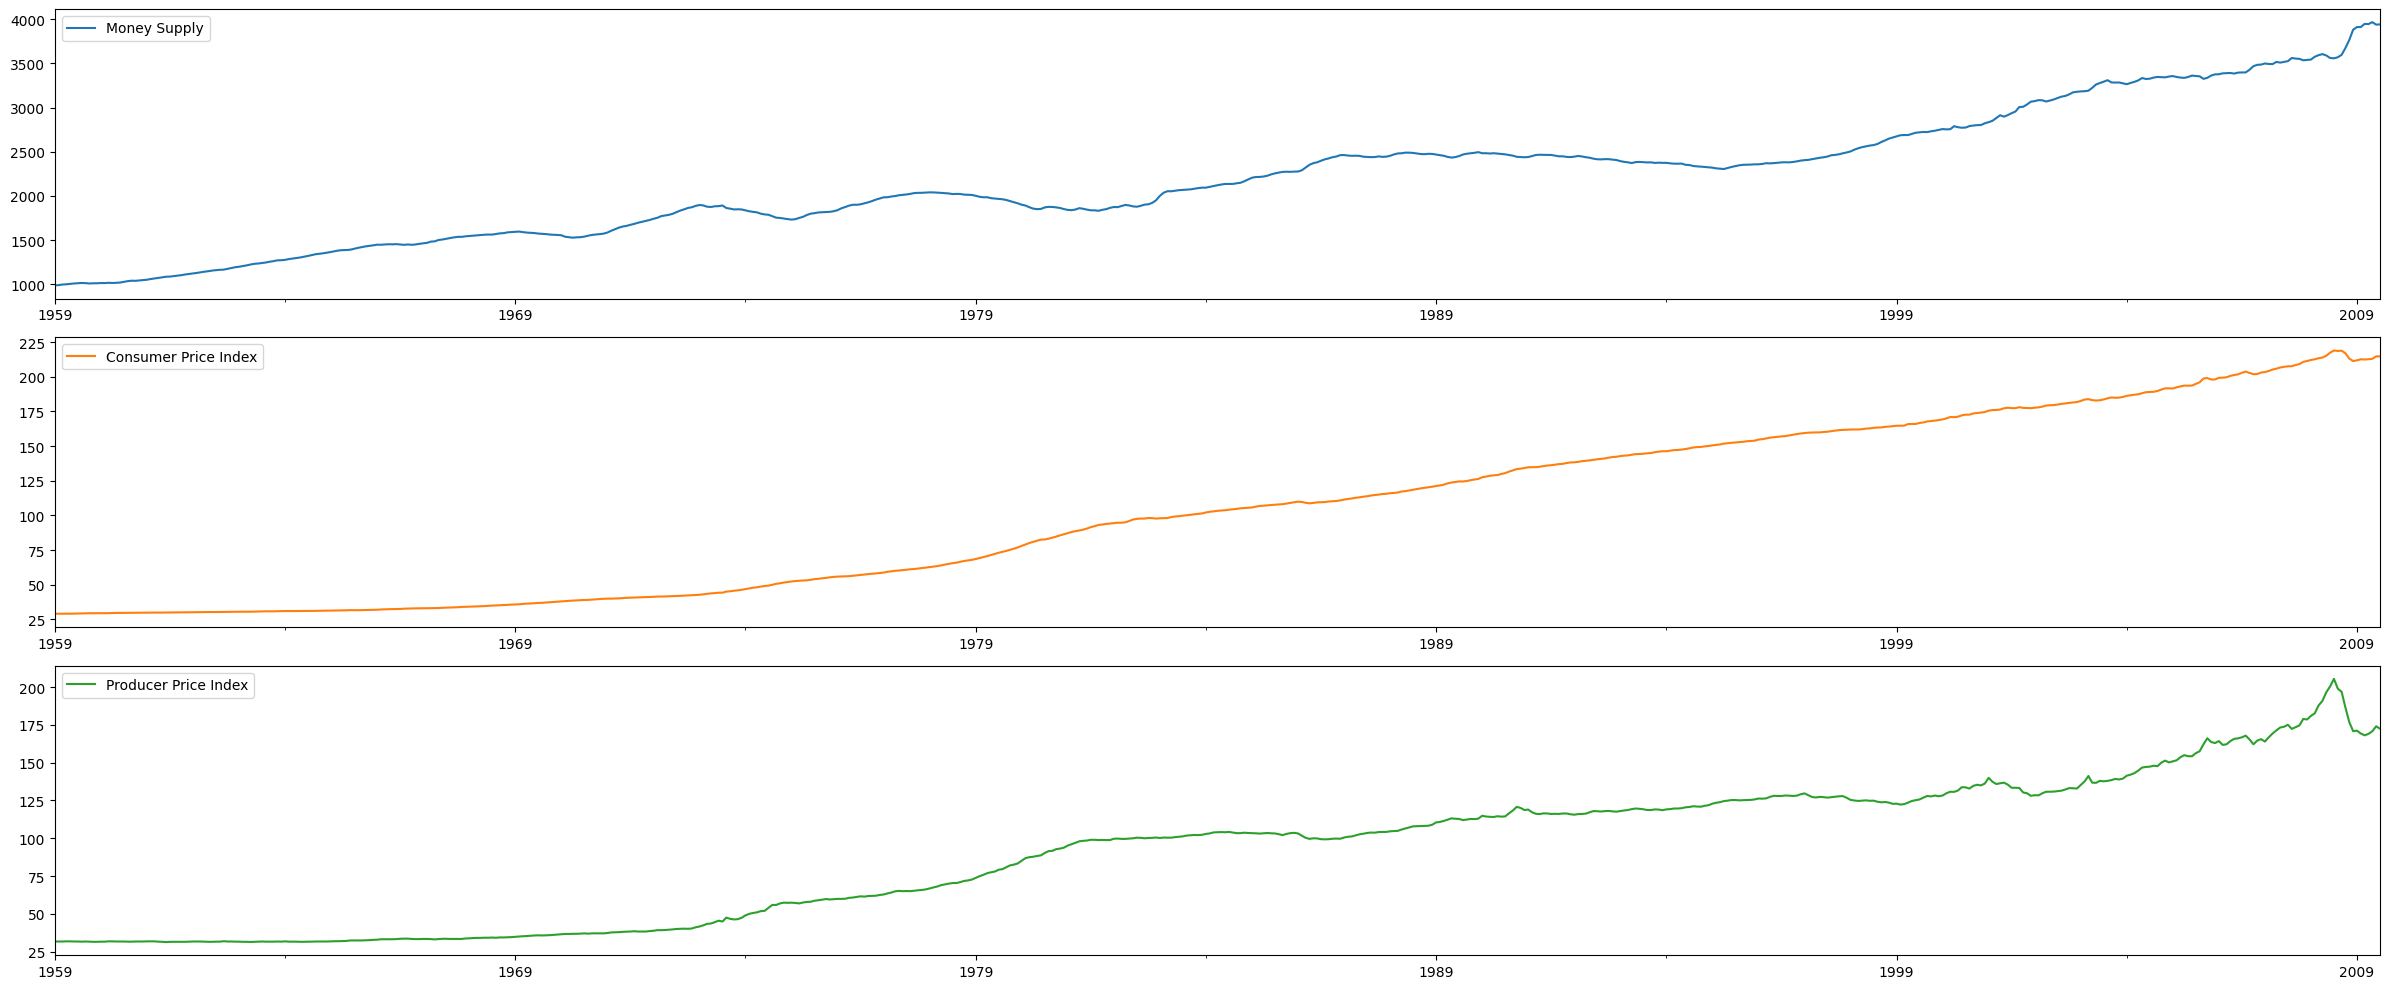

In [2]:
fig, axes = plt.subplots(K, figsize = (24, 10), sharex = True)
train_df.plot(ax = axes, subplots = True)
for axis in axes:
    axis.legend(loc = "upper left")
    axis.tick_params(labelbottom = True)
plt.xlabel("")
plt.tight_layout()
plt.show()

There is a clear, increasing trend in each of the time series, none of them are stationary. So first I will difference each series then check whether additional differencing is needed.

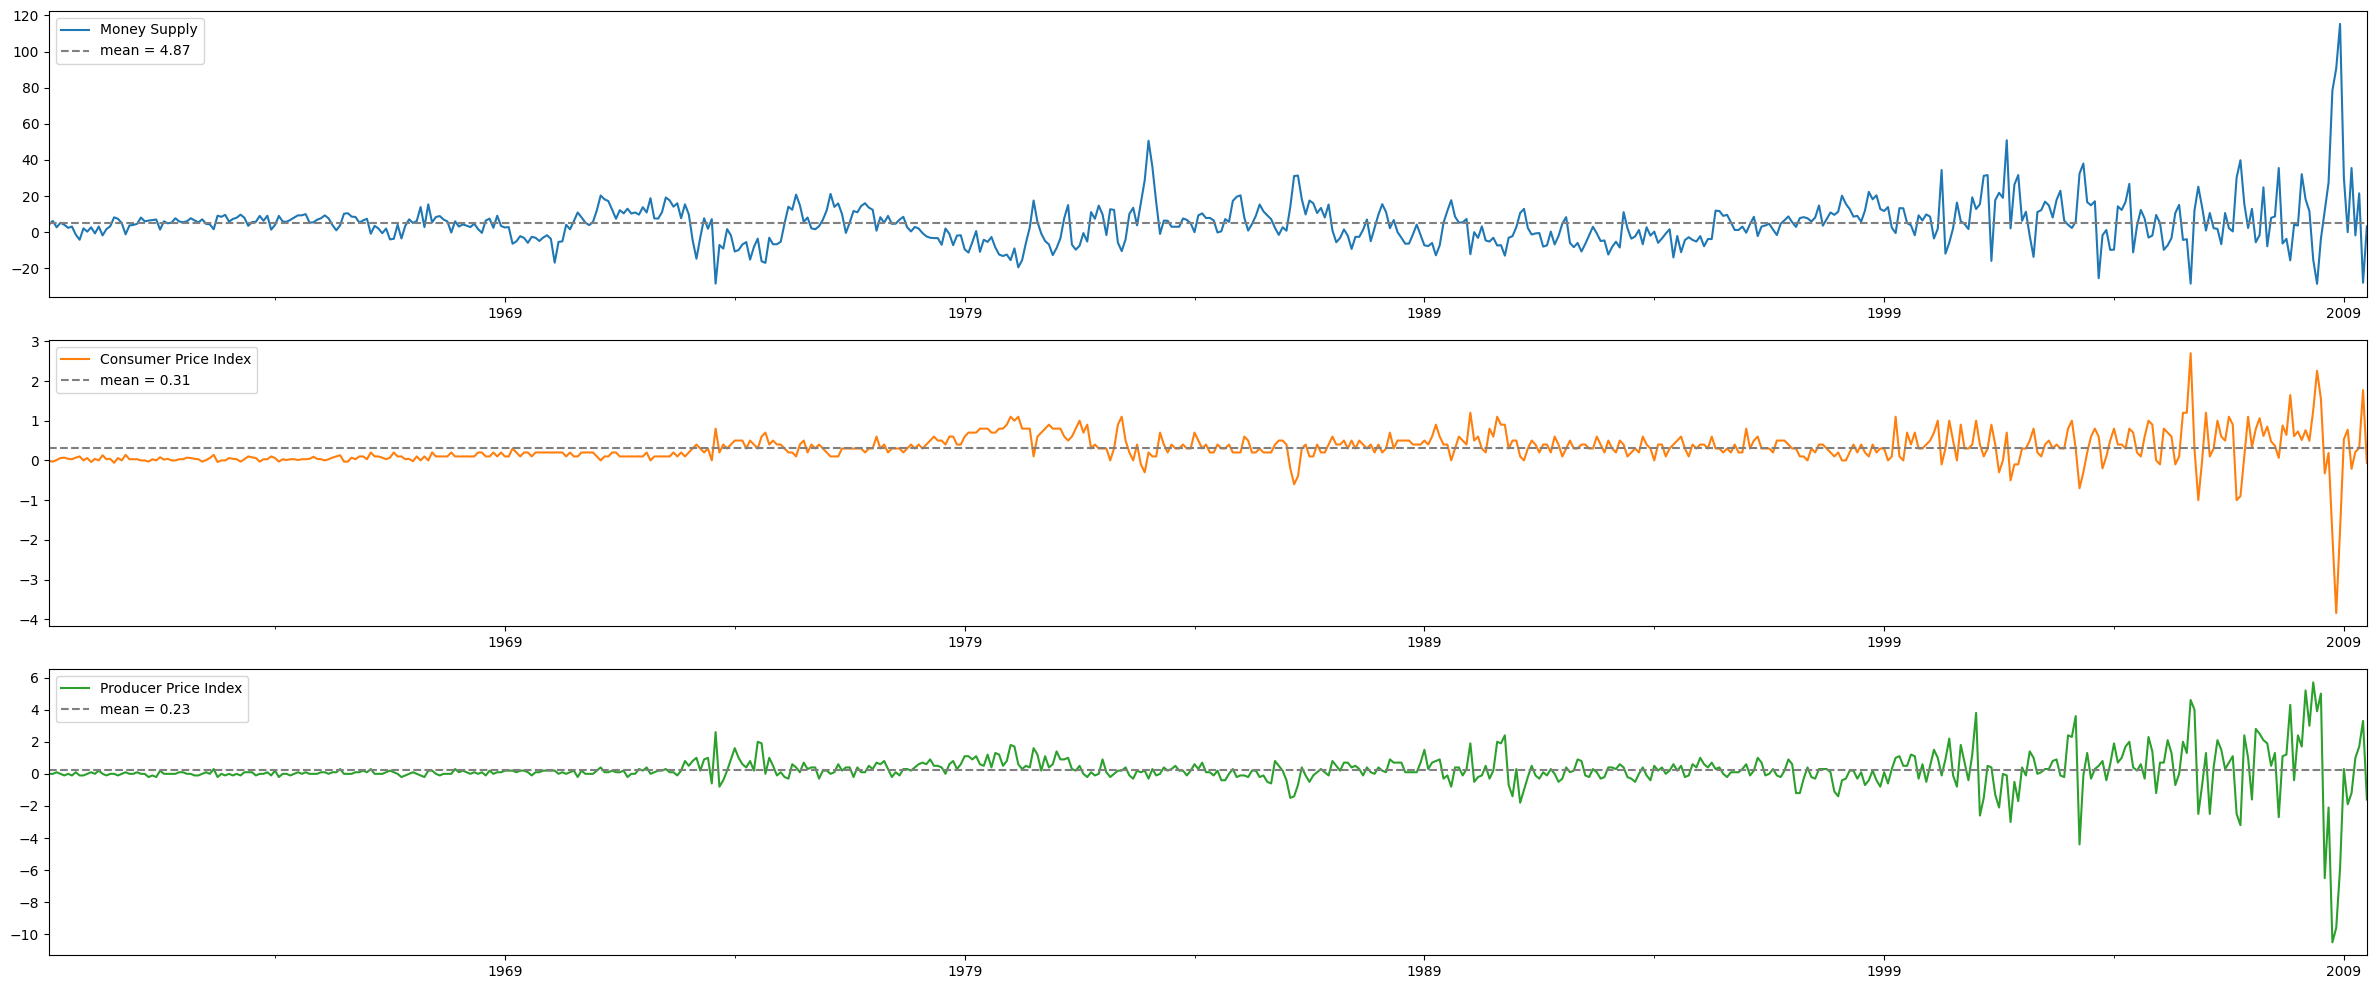

In [3]:
train_diff = train_df.diff(1).dropna().copy()

fig, axes = plt.subplots(K, figsize = (24, 10), sharex = True)
train_diff.plot(ax = axes, subplots = True)
for name, axis in zip(names, axes):
    mean_val = train_diff[name].mean()
    axis.axhline(mean_val,
                 linestyle = "--",
                 color = "gray",
                 label = f"mean = {mean_val:.2f}")
    axis.legend(loc="upper left")
    axis.tick_params(labelbottom = True)
plt.xlabel("")
plt.tight_layout()
plt.show()

The trend is mostly gone now but it looks like there is still a clear trend in consumer price index and some potential trends in money supply. Before continuing I will look at the sample ACF and PACF of each time series to check whether they need additional differencing.

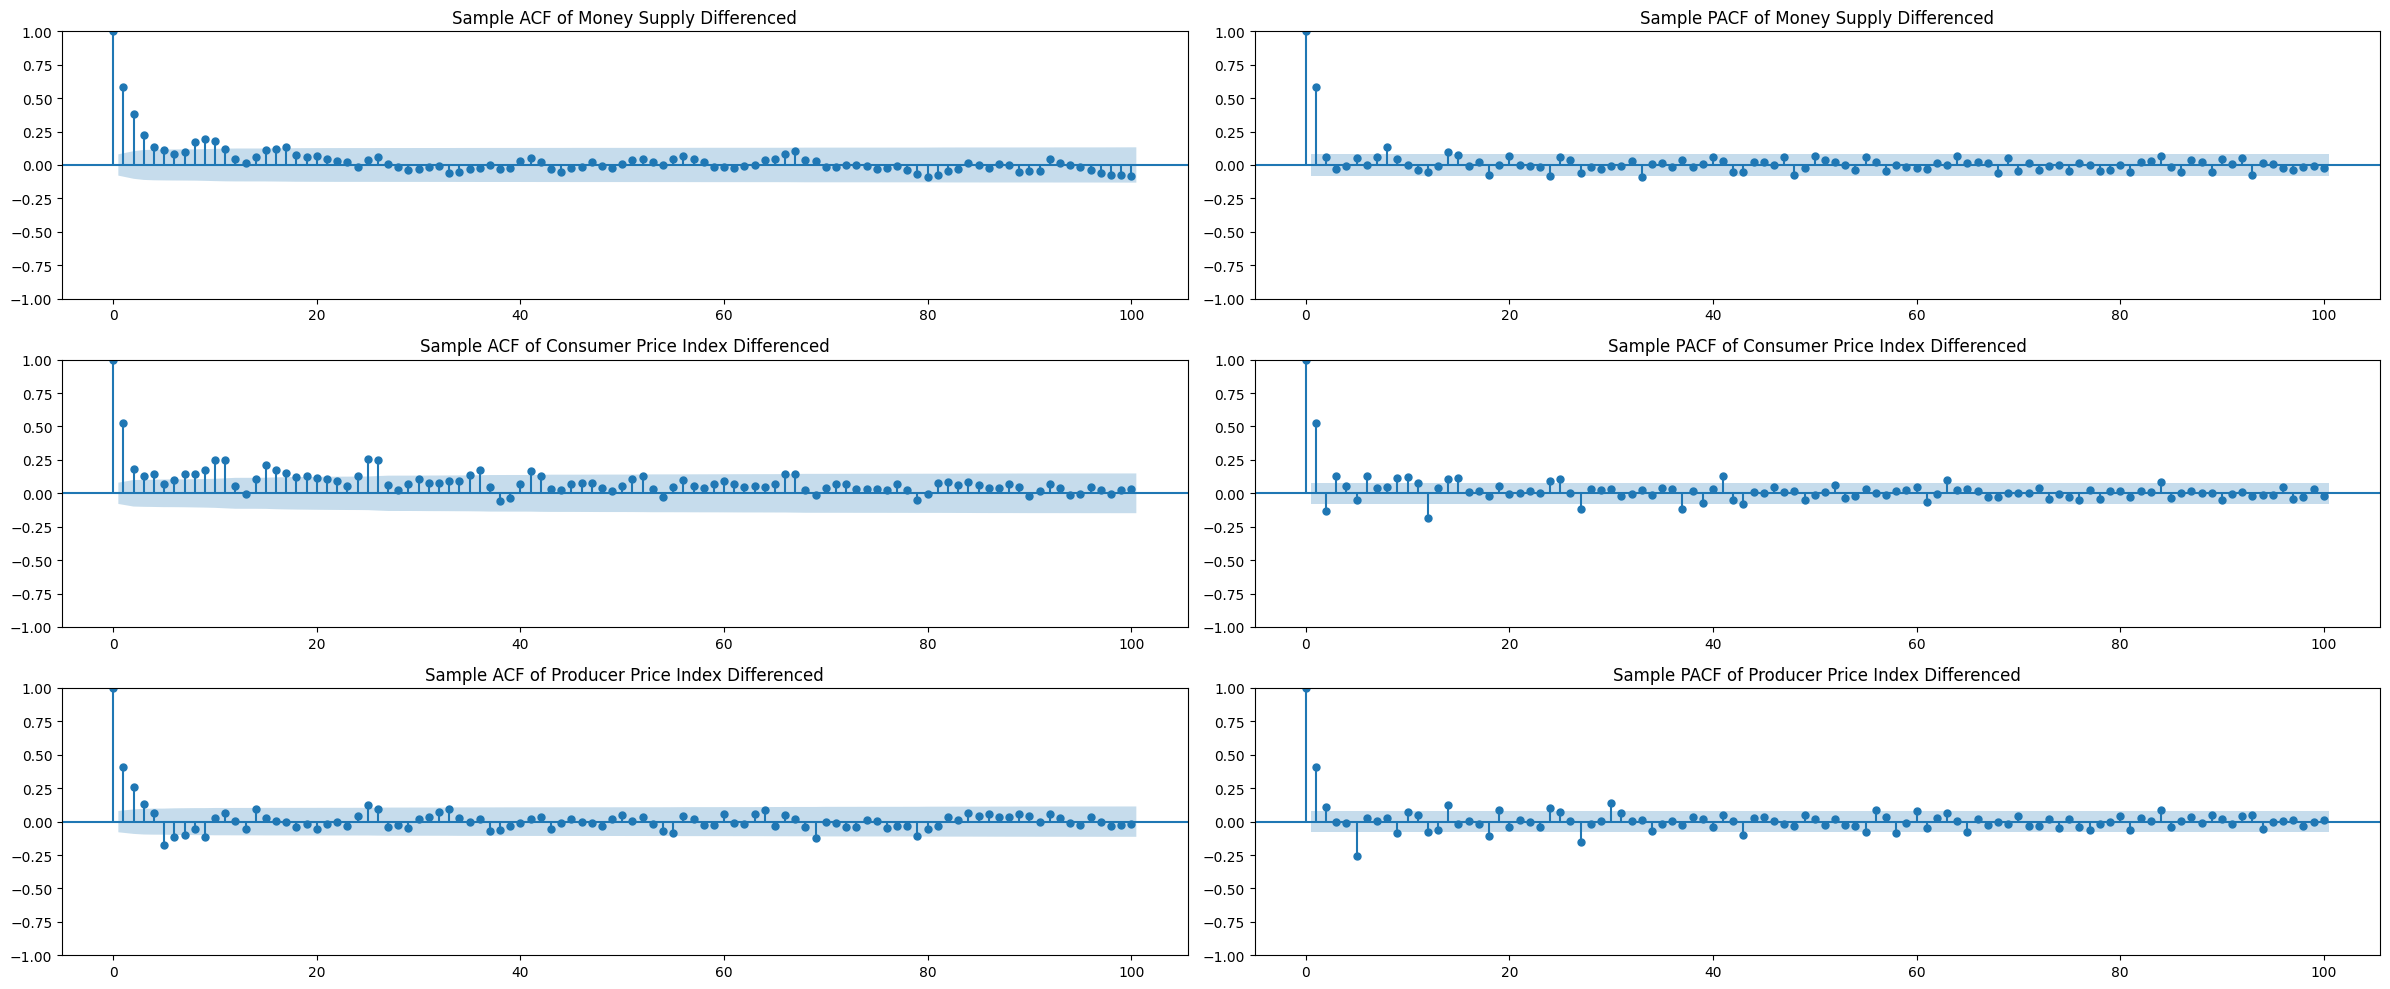

In [4]:
fig, axes = plt.subplots(nrows = K, ncols = 2, figsize = (24, 10))
for i, name in enumerate(names):
    # Plot the ACF in left column
    sm.graphics.tsa.plot_acf(train_diff[name], lags = 100, ax = axes[i, 0])
    axes[i, 0].set_title(f"Sample ACF of {name} Differenced")
    # Plot the PACF in right column
    sm.graphics.tsa.plot_pacf(train_diff[name], lags = 100, ax = axes[i, 1])
    axes[i, 1].set_title(f"Sample PACF of {name} Differenced")
plt.tight_layout()
plt.show()

There is a large spike at lag 1 in the sample PACF of money supply with a semi-slow decay in the sample ACF. This suggests that money supply needs additional differencing. Similarly there is a large spike at lag 1 in the sample PACF of consumer price index with a much slower decay in the sample ACF. This suggests that consumer price index definitely needs additional differencing. Producer price index does not need any additional differencing as the sample ACF and PACF both decay quickly. So I will difference money supply and consumer price index one more time then check the sample ACF and PACF again to be sure I have not overdifferenced. We also know from plotting the data before that the scales of all of these series are different. So I will standardize the data before fitting any models.

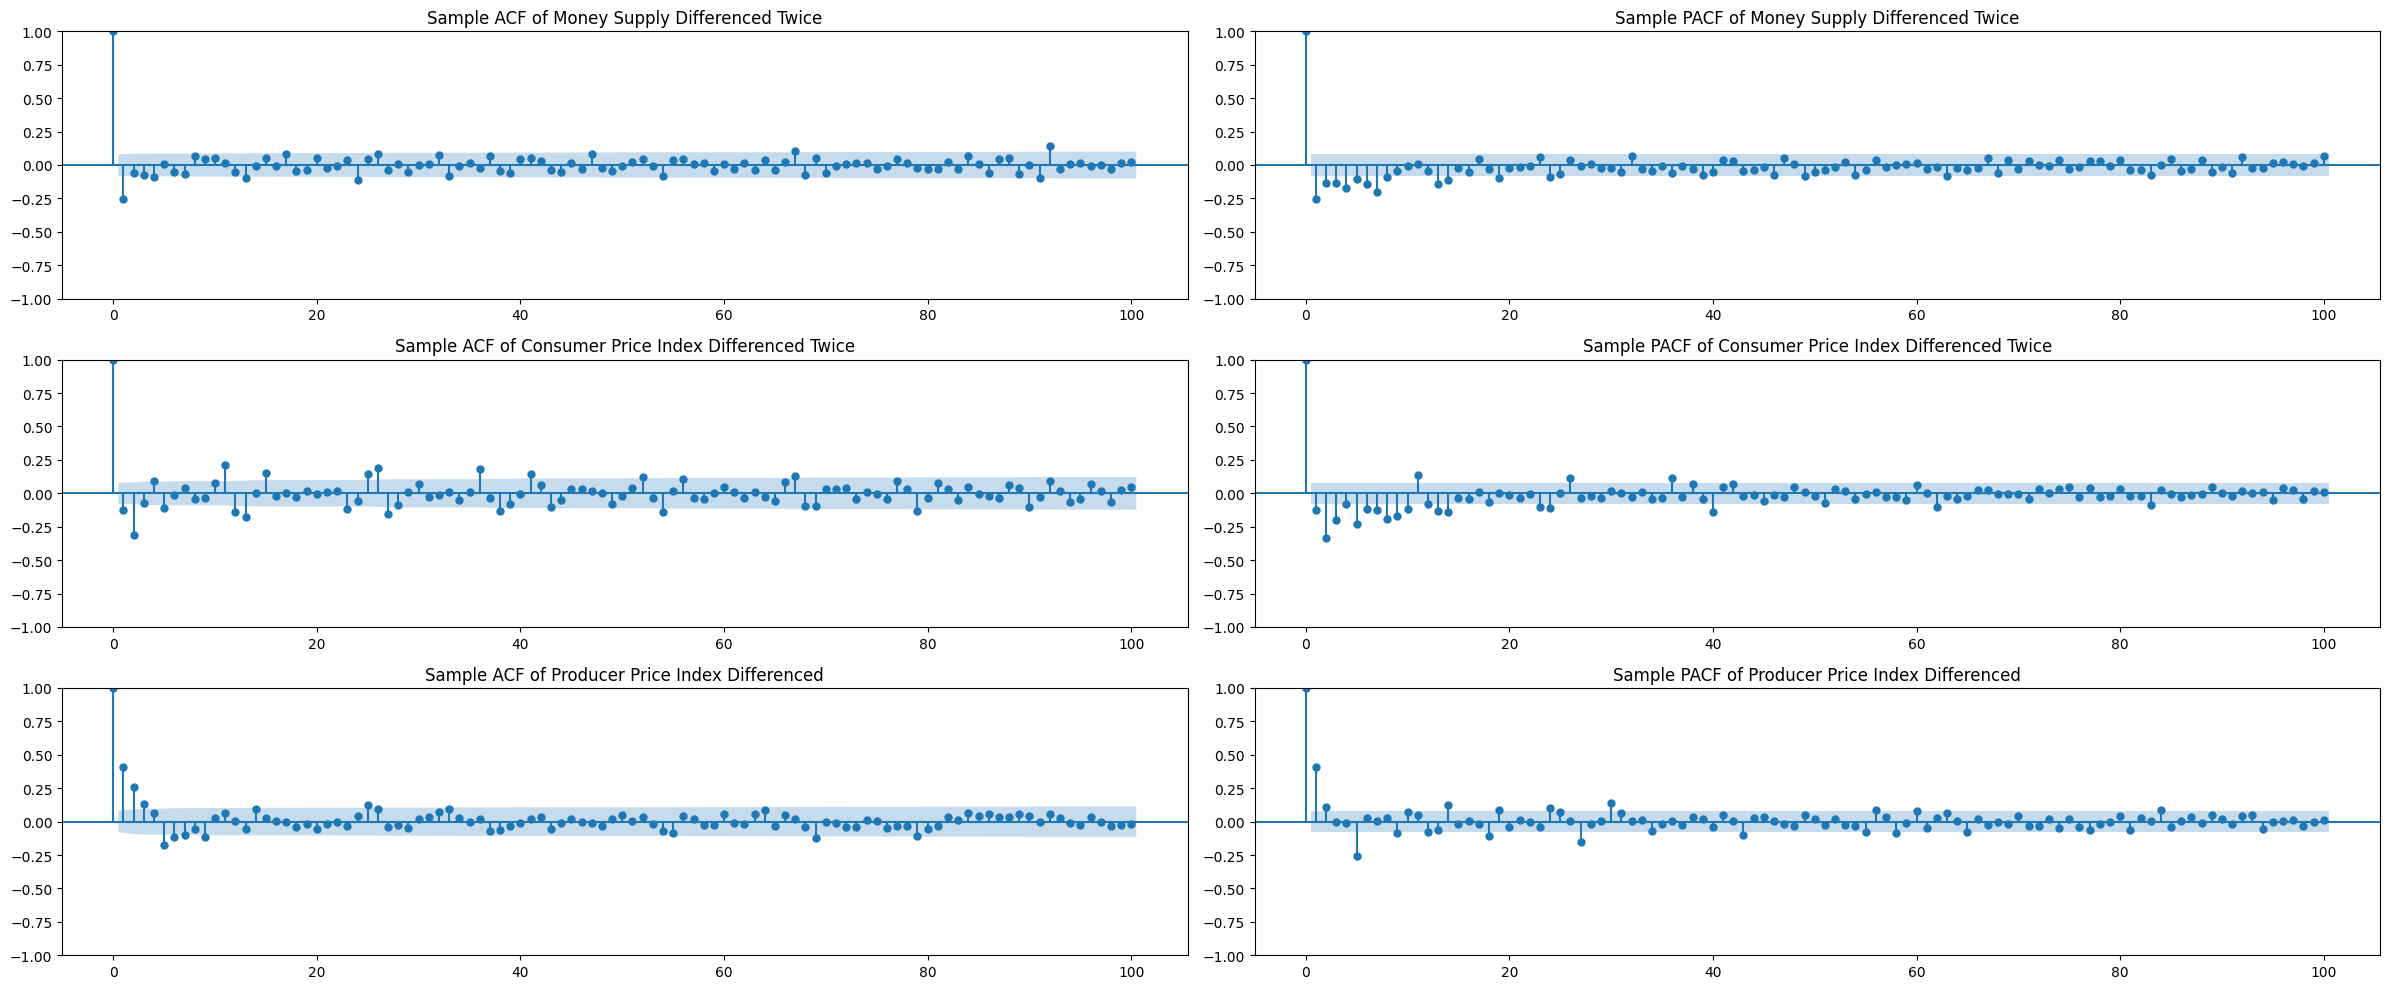

In [5]:
# Which columns need another difference
need_double_diff = [
  "Money Supply",
  "Consumer Price Index"
]

# Difference data that needs it
train = train_diff.copy()
for name in need_double_diff:
  train[name] = train[name].diff(1)
train = train.dropna()

# Standardize data
sds = {}
for name in names:
  sds[name] = np.std(train[name])
  train[name] /= sds[name]

fig, axes = plt.subplots(nrows = K, ncols = 2, figsize = (24, 10))
for i, name in enumerate(names):
    # Plot the ACF in left column
    sm.graphics.tsa.plot_acf(train[name], lags = 100, ax = axes[i, 0])
    if name in need_double_diff:
        axes[i, 0].set_title(f"Sample ACF of {name} Differenced Twice")
    else:
        axes[i, 0].set_title(f"Sample ACF of {name} Differenced")
    # Plot the PACF in right column
    sm.graphics.tsa.plot_pacf(train[name], lags = 100, ax = axes[i, 1])
    if name in need_double_diff:
        axes[i, 1].set_title(f"Sample PACF of {name} Differenced Twice")
    else:
        axes[i, 1].set_title(f"Sample PACF of {name} Differenced")
plt.tight_layout()
plt.show()

These look much better now. There doesn't seem to be overdifferencing for money supply or consumer price index since there is no very large negative spike in the sample ACF or PACF at lag 1. Now I will take a look at the fully differenced data and check that the trends are gone.

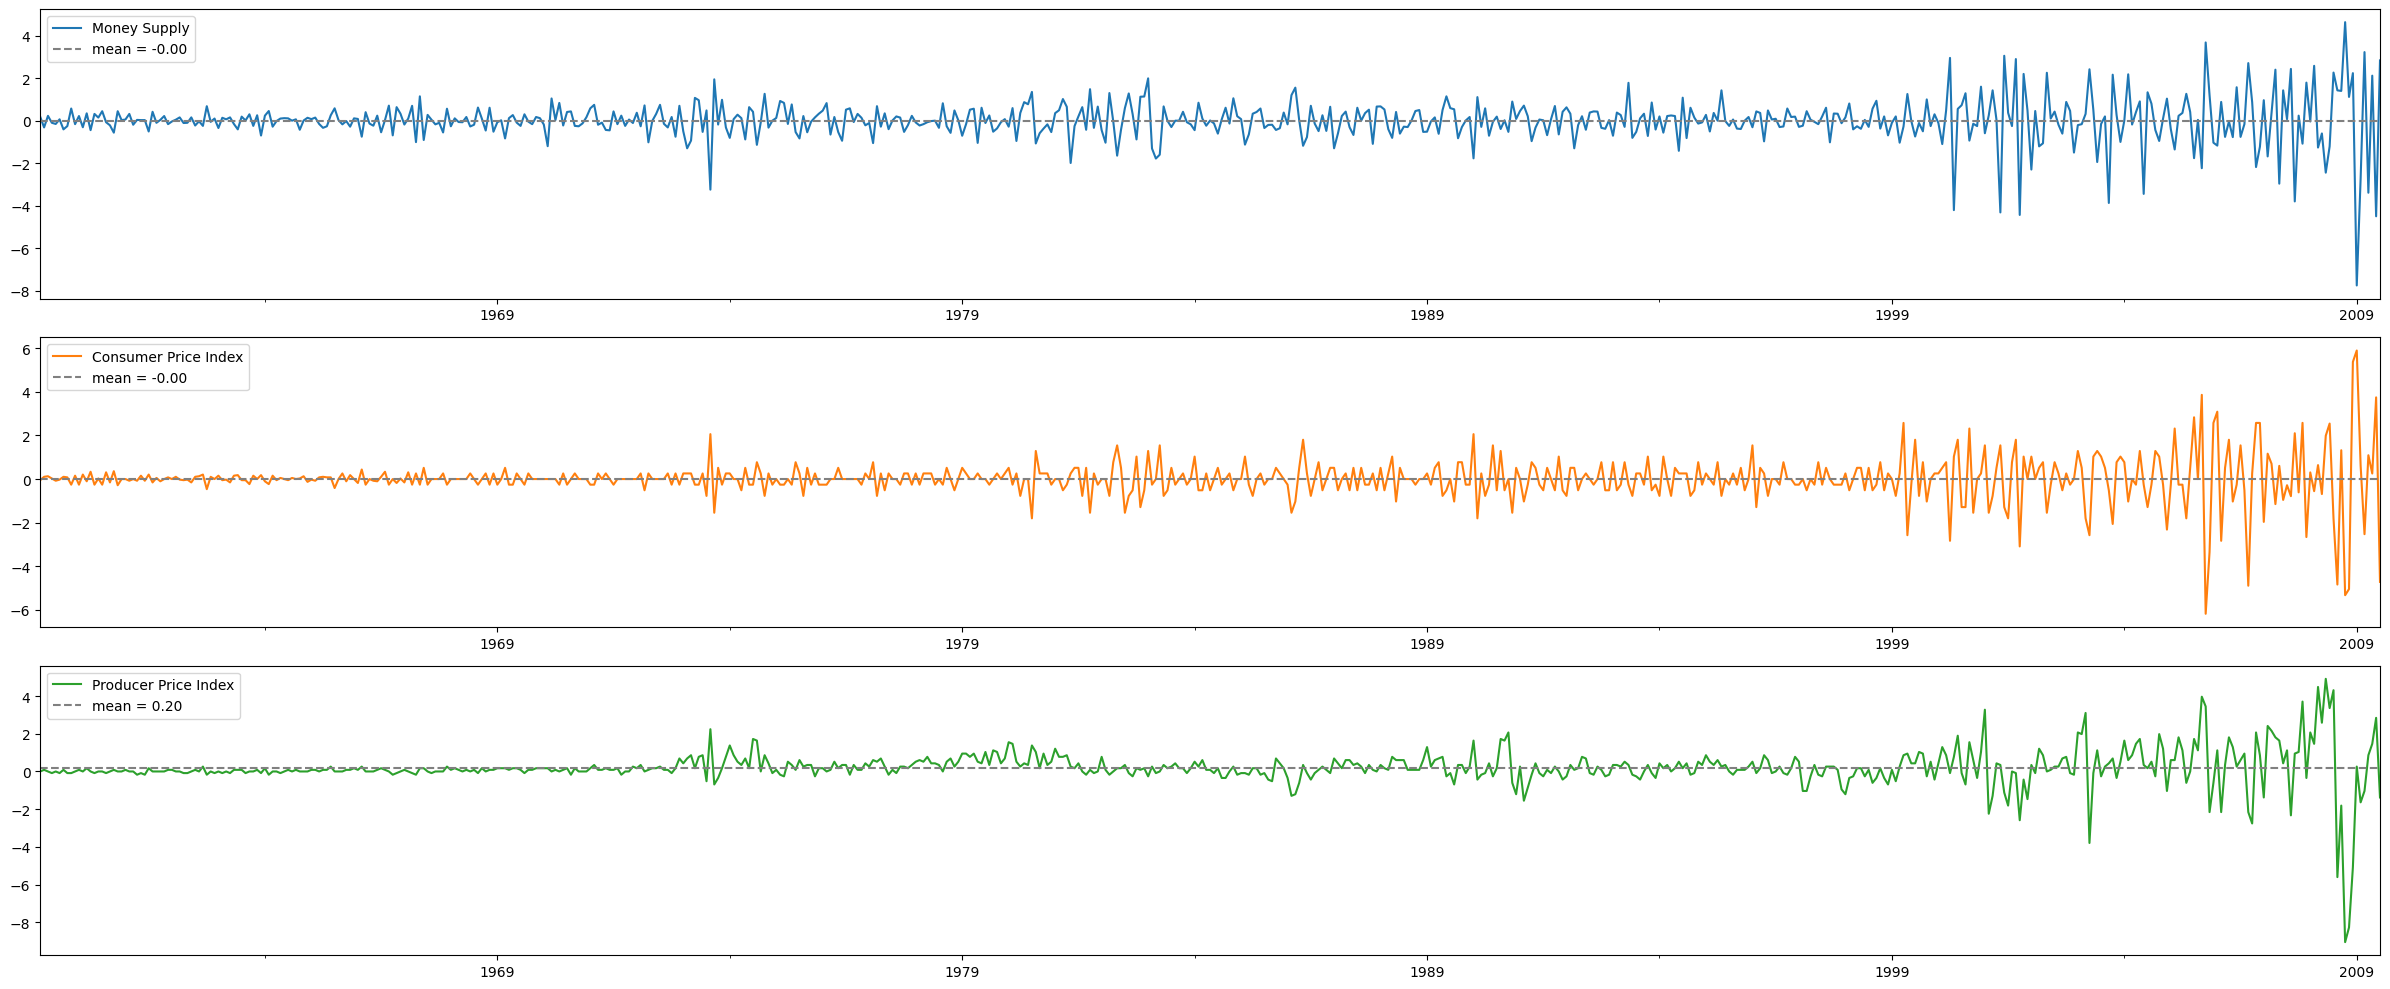

In [6]:
fig, axes = plt.subplots(K, figsize = (24, 10), sharex = True)
train.plot(ax = axes, subplots = True)
for name, axis in zip(names, axes):
    mean_val = train[name].mean()
    axis.axhline(mean_val,
               linestyle = "--",
               color = "gray",
               label = f"mean = {mean_val:.2f}")
    axis.legend(loc="upper left")
    axis.tick_params(labelbottom = True)
plt.xlabel("")
plt.tight_layout()
plt.show()

Clearly the trends have been removed, these time series are now stationary. Additionally, they are all on the same scale now. This is an ideal scenario to now fit a model according to the Box-Jenkins methodology. When looking at the sample ACF and PACF before most of the significant lags are rather small with a few significant lags later on, but none really greater 60. First I will take a closer look at the sample ACF and PACF for lags up to 60.

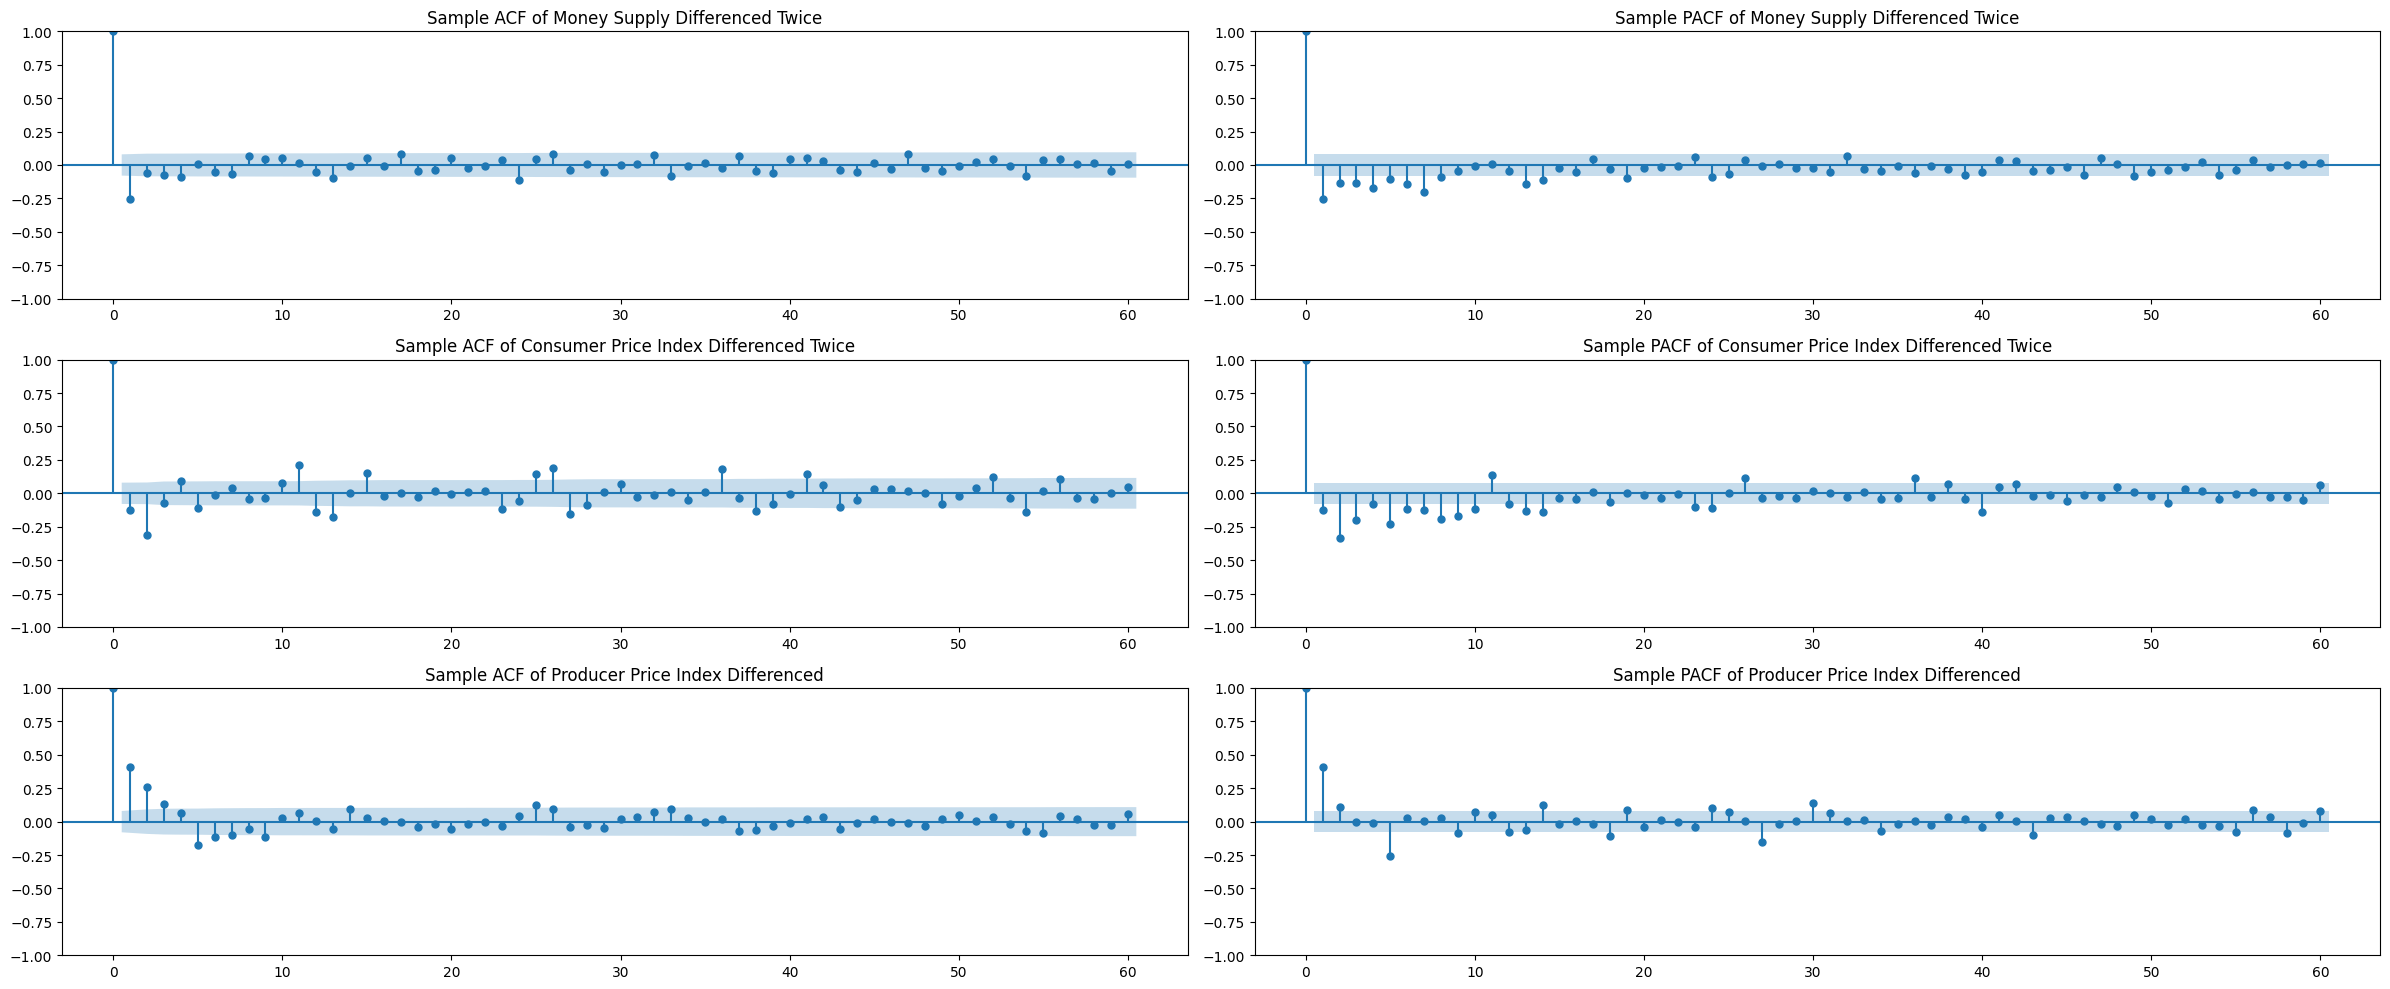

In [7]:
fig, axes = plt.subplots(nrows = K, ncols = 2, figsize = (24, 10))
for i, name in enumerate(names):
    # Plot the ACF in left column
    sm.graphics.tsa.plot_acf(train[name], lags = 60, ax = axes[i, 0])
    if name in need_double_diff:
        axes[i, 0].set_title(f"Sample ACF of {name} Differenced Twice")
    else:
        axes[i, 0].set_title(f"Sample ACF of {name} Differenced")
    # Plot the PACF in right column
    sm.graphics.tsa.plot_pacf(train[name], lags = 60, ax = axes[i, 1])
    if name in need_double_diff:
        axes[i, 1].set_title(f"Sample PACF of {name} Differenced Twice")
    else:
        axes[i, 1].set_title(f"Sample PACF of {name} Differenced")
plt.tight_layout()
plt.show()

For money supply I will clearly want $q$ to be no larger than 1 and it is clear I won't want $p$ to be larger than 13 since all of the lags after are negligible. For consumer price index most of the significant lags are between 1 and 13 but there are a few lags further out that exceed the significance region (for example lag 36 in the sample ACF and lag 40 in the sample PACF). For producer price index most of the significant lags are less than 10 but here there are also a few lags further out that exceed the significance region (for example lag 27 in the sample PACF). We can use these observations to choose a set of potential models and use a model selection criteria to select parameters.

## Fitting ARMA Models

I will use AIC to for model selection here since it aims to provide a balance between modelcomplexity and goodness of fit, ideal for forecasting.

Before continuing I write a function for undifferencing the data when we want to make predictions so that the scale of the predictions is the same as the original data.

In [8]:
def undifference(name, where, m):
  # Check that the time series is valid
  assert name in names

  # If it needs double differencing apply
  # a double undifference transformation
  if name in need_double_diff:
    undiff = (where[name].cumsum() + \
             np.repeat(train_diff[name].values[-1], m)).cumsum() + \
             np.repeat(train_df[name].values[-1], m)
  # Otherwise just apply a single
  # undifference transformation
  else:
    undiff = where[name].cumsum() + \
             np.repeat(train_df[name].values[-1], m)
  return(undiff)

Now I move on to fit the ARMA models.

In [ ]:
# Parameters from EDA
ARMA_params = {
  "Money Supply": [
    (p, 0, q)
    for p in [0, 1, 4, 7, 13]
    for q in [0, 1]
  ],
  "Consumer Price Index": [
    (p, 0, q)
    for p in [0, 2, 5, 9, 14, 24, 40]
    for q in [0, 2, 11, 13, 26, 36]
  ],
  "Producer Price Index": [
    (p, 0, q)
    for p in [0, 1, 5, 27]
    for q in [0, 2, 5]
  ]
}

# Initialize model dictionaries
ARMA_models = {}
fcasts_ARMA = {}
MSEs_ARMA = {}

for name in names:
  # Get series and parameters
  series = train[name].values
  best_model = {"AIC": np.inf}
  params = ARMA_params[name]

  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for param in params:
      try:
        # Fit the ARMA(p,q) model
        model = ARIMA(series, 
                      order = param
                      ).fit()
        # Perform Model Selection
        # Criteria with AIC
        AIC = model.aic
        if AIC < best_model["AIC"]:
          best_model["AIC"] = AIC
          best_model["param"] = param
          best_model["Model"] = model
      # If an error occurs print the
      # statement and continue
      except Exception as e:
        print(f"{name} ARMA({param}) failed: {e}")
        continue
    # Get forecasts and MSE for best models
    ARMA_models[name] = best_model
    fcast_standard = best_model["Model"].get_forecast(n_test).predicted_mean
    fcasts_ARMA[name] = fcast_standard*sds[name]
    fcasts_ARMA[name] = undifference(name, fcasts_ARMA, n_test)
    MSEs_ARMA[name] = np.mean((fcasts_ARMA[name] - test_df[name].values)**2)
  del best_model["Model"]
  print(f"{name} Chosen parameters: ", ARMA_models[name]["param"])

Money Supply Chosen parameters:  (1, 0, 1)
Consumer Price Index Chosen parameters:  (14, 0, 13)
Producer Price Index Chosen parameters:  (27, 0, 5)


So the best ARMA model for the double differenced money supply data according to AIC is ARMA(1, 1), the best ARMA model for the double differenced consumer price index data according to AIC is ARMA(14, 13), and the best ARMA model for the once differenced producer price index data according to AIC is ARMA(27, 5). I will now move on to fitting the VAR model.

## Fitting VAR Model

I will use the same model selection criteria as before, AIC. First I implement the multivariate least squares estimator, forecasting, and AIC from scratch. I also implemented the Hannan & Quinn (frequentist) and Schwarz (Bayesian) criterions which are consistent for finding the true order of a VAR($p$) process while AIC is not. However, AIC still performs well when balancing model complexity and accuracy so I will stick with AIC for my selection criteria.

In [10]:
def fit_VAR(Y, p):
  # Get dimensions of data
  K, T = Y.shape
  # Raise error if not enough
  # data to fit model
  if T <= p:
    raise ValueError("Lag order p should be less than time series length T")
  # Since we need points
  # y_t-p+1 up to y_0
  # we can't use the starting p
  # points of our data
  useable = T - p

  # Initialize Z matrix
  Z = np.ones((K*p + 1, useable))

  for t in range(p, T):
    # Get the Zt vectors
    Zt = []
    for j in range(1, p + 1):
      Zt.append(Y[:,t-j])
    # Create Z matrix
    Z[1:,t-p] = np.concatenate(Zt)
  # Find multivariate least
  # squares estimator
  y_useable = Y[:,p:]
  B = y_useable @ Z.T @ np.linalg.inv(Z @ Z.T)
  return(Z, B)

def extract_VAR_coeffs(B, K, p):
  # Get v (intercept)
  v = B[:,0]
  # Get coefficient
  # matrices
  A = []
  for j in range(p):
    start = 1 + j*K
    end = start + K
    A.append(B[:,start:end])
  return(v, A)

def predict_next_VAR(lags, v, A):
  p = len(A)
  y_next = v.copy()
  # Implement one step
  # forecasting
  for j in range(p):
    y_next += A[j] @ lags[-1-j]
  return(y_next)

def get_predictions_VAR(y0, v, A, m):
  K = v.shape[0]
  lags = y0
  # Initialize the predictions
  pred = np.zeros((K, m))
  # Repeatedly get next prediction
  for t in range(m):
    y_pred = predict_next_VAR(lags, v, A)
    pred[:,t] = y_pred
    lags.append(y_pred)
    lags.pop(0)
  return(pred)

# Get covariance matrix
# and different criterion
def get_covmat(Z, Y, p):
  y_useable = Y[:,p:]
  _, T = y_useable.shape
  Sigma = (y_useable @ (np.identity(T) - Z.T @ np.linalg.inv(Z @ Z.T) @ Z) @ y_useable.T)/T
  return(Sigma)

def get_AIC(Sigma, p, Y):
  y_useable = Y[:,p:]
  K, T = y_useable.shape
  AIC = np.log(np.linalg.det(Sigma)) + (2*p*(K**2))/T
  return(AIC)

def get_HQ(Sigma, p, Y):
  y_useable = Y[:,p:]
  K, T = y_useable.shape
  HQ = np.log(np.linalg.det(Sigma)) + ((2*np.log(np.log(T)))*p*(K**2))/T
  return(HQ)

def get_SC(Sigma, p, Y):
  y_useable = Y[:,p:]
  K, T = y_useable.shape
  SC = np.log(np.linalg.det(Sigma)) + ((np.log(T))*p*(K**2))/T
  return(SC)

I will use 40 as the maximum lag allowed for the VAR($p$) model since this was the highest value of $p$ allowed to be chosen in the ARMA modeling. This is so that I don't give additional power to VAR simply by using a larger order $p$.

In [16]:
# Create Y matrix
# Note that I am staying
# consistent with my notation
# before by making it a kxT matrix
Y = train.to_numpy().T
pvals = range(1, 41)
best_model = {"AIC": np.inf}

import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  for p in pvals:
    try:
      # Fit the VAR(p) model
      Z, B = fit_VAR(Y, p)
      v, A = extract_VAR_coeffs(B, Y.shape[0], p)
      Sigma = get_covmat(Z, Y, p)
      # Perform model selection
      # with AIC
      AIC = get_AIC(Sigma, p, Y)
      if AIC < best_model["AIC"]:
        best_model["p"] = p
        best_model["AIC"] = AIC
        best_model["Z"] = Z
        best_model["B"] = B
        best_model["v"] = v
        best_model["A"] = A
        best_model["Sigma"] = Sigma
    # If something went wrong
    # print the error and continue
    except Exception as e:
      print(f"VAR({p}) failed: {e}")
      continue

print(f"Best model found: VAR({best_model["p"]})")
print("AIC:", best_model["AIC"])
print("\nEstimated Intercept v:")
print( v)
print("\nEstimated Coefficient Matrices:")
for j in range(len(A)):
  print(f"A[{j+1}]")
  print(A[j])

Best model found: VAR(40)
AIC: -2.5480833696459007

Estimated Intercept v:
[-0.06537982  0.06976205  0.0893726 ]

Estimated Coefficient Matrices:
A[1]
[[-0.53801146 -0.01294283 -0.14659832]
 [-0.10632013 -0.76924583  0.29124425]
 [-0.0777183   0.03650318  0.37969598]]
A[2]
[[-0.35817095  0.17165142 -0.16602347]
 [-0.15500819 -1.04743517  0.1761996 ]
 [-0.05471487 -0.02593942  0.17741368]]
A[3]
[[-0.31697552  0.27084699  0.10347613]
 [-0.11860949 -1.01088648  0.01936044]
 [-0.1140664  -0.09451689  0.04775203]]
A[4]
[[-0.4019932   0.05457774  0.02707366]
 [-0.19970617 -0.90051025 -0.0700718 ]
 [-0.12974531  0.22089321 -0.10421952]]
A[5]
[[-0.32114409  0.03985709  0.17487004]
 [-0.05876626 -0.95222469 -0.08938273]
 [-0.02330029  0.01773203 -0.19604015]]
A[6]
[[-0.31057402 -0.0092662   0.02824497]
 [-0.03353301 -0.69831557 -0.0179019 ]
 [-0.0788055   0.19793662 -0.04210967]]
A[7]
[[-0.38287072 -0.07320378  0.03902169]
 [-0.02272725 -0.50934761 -0.0672831 ]
 [-0.08831215  0.37221709 -0.1127

So the best VAR model for the multivariate time series of double differenced money supply, double differenced consumer price index, and once differenced producer price index is VAR(40).

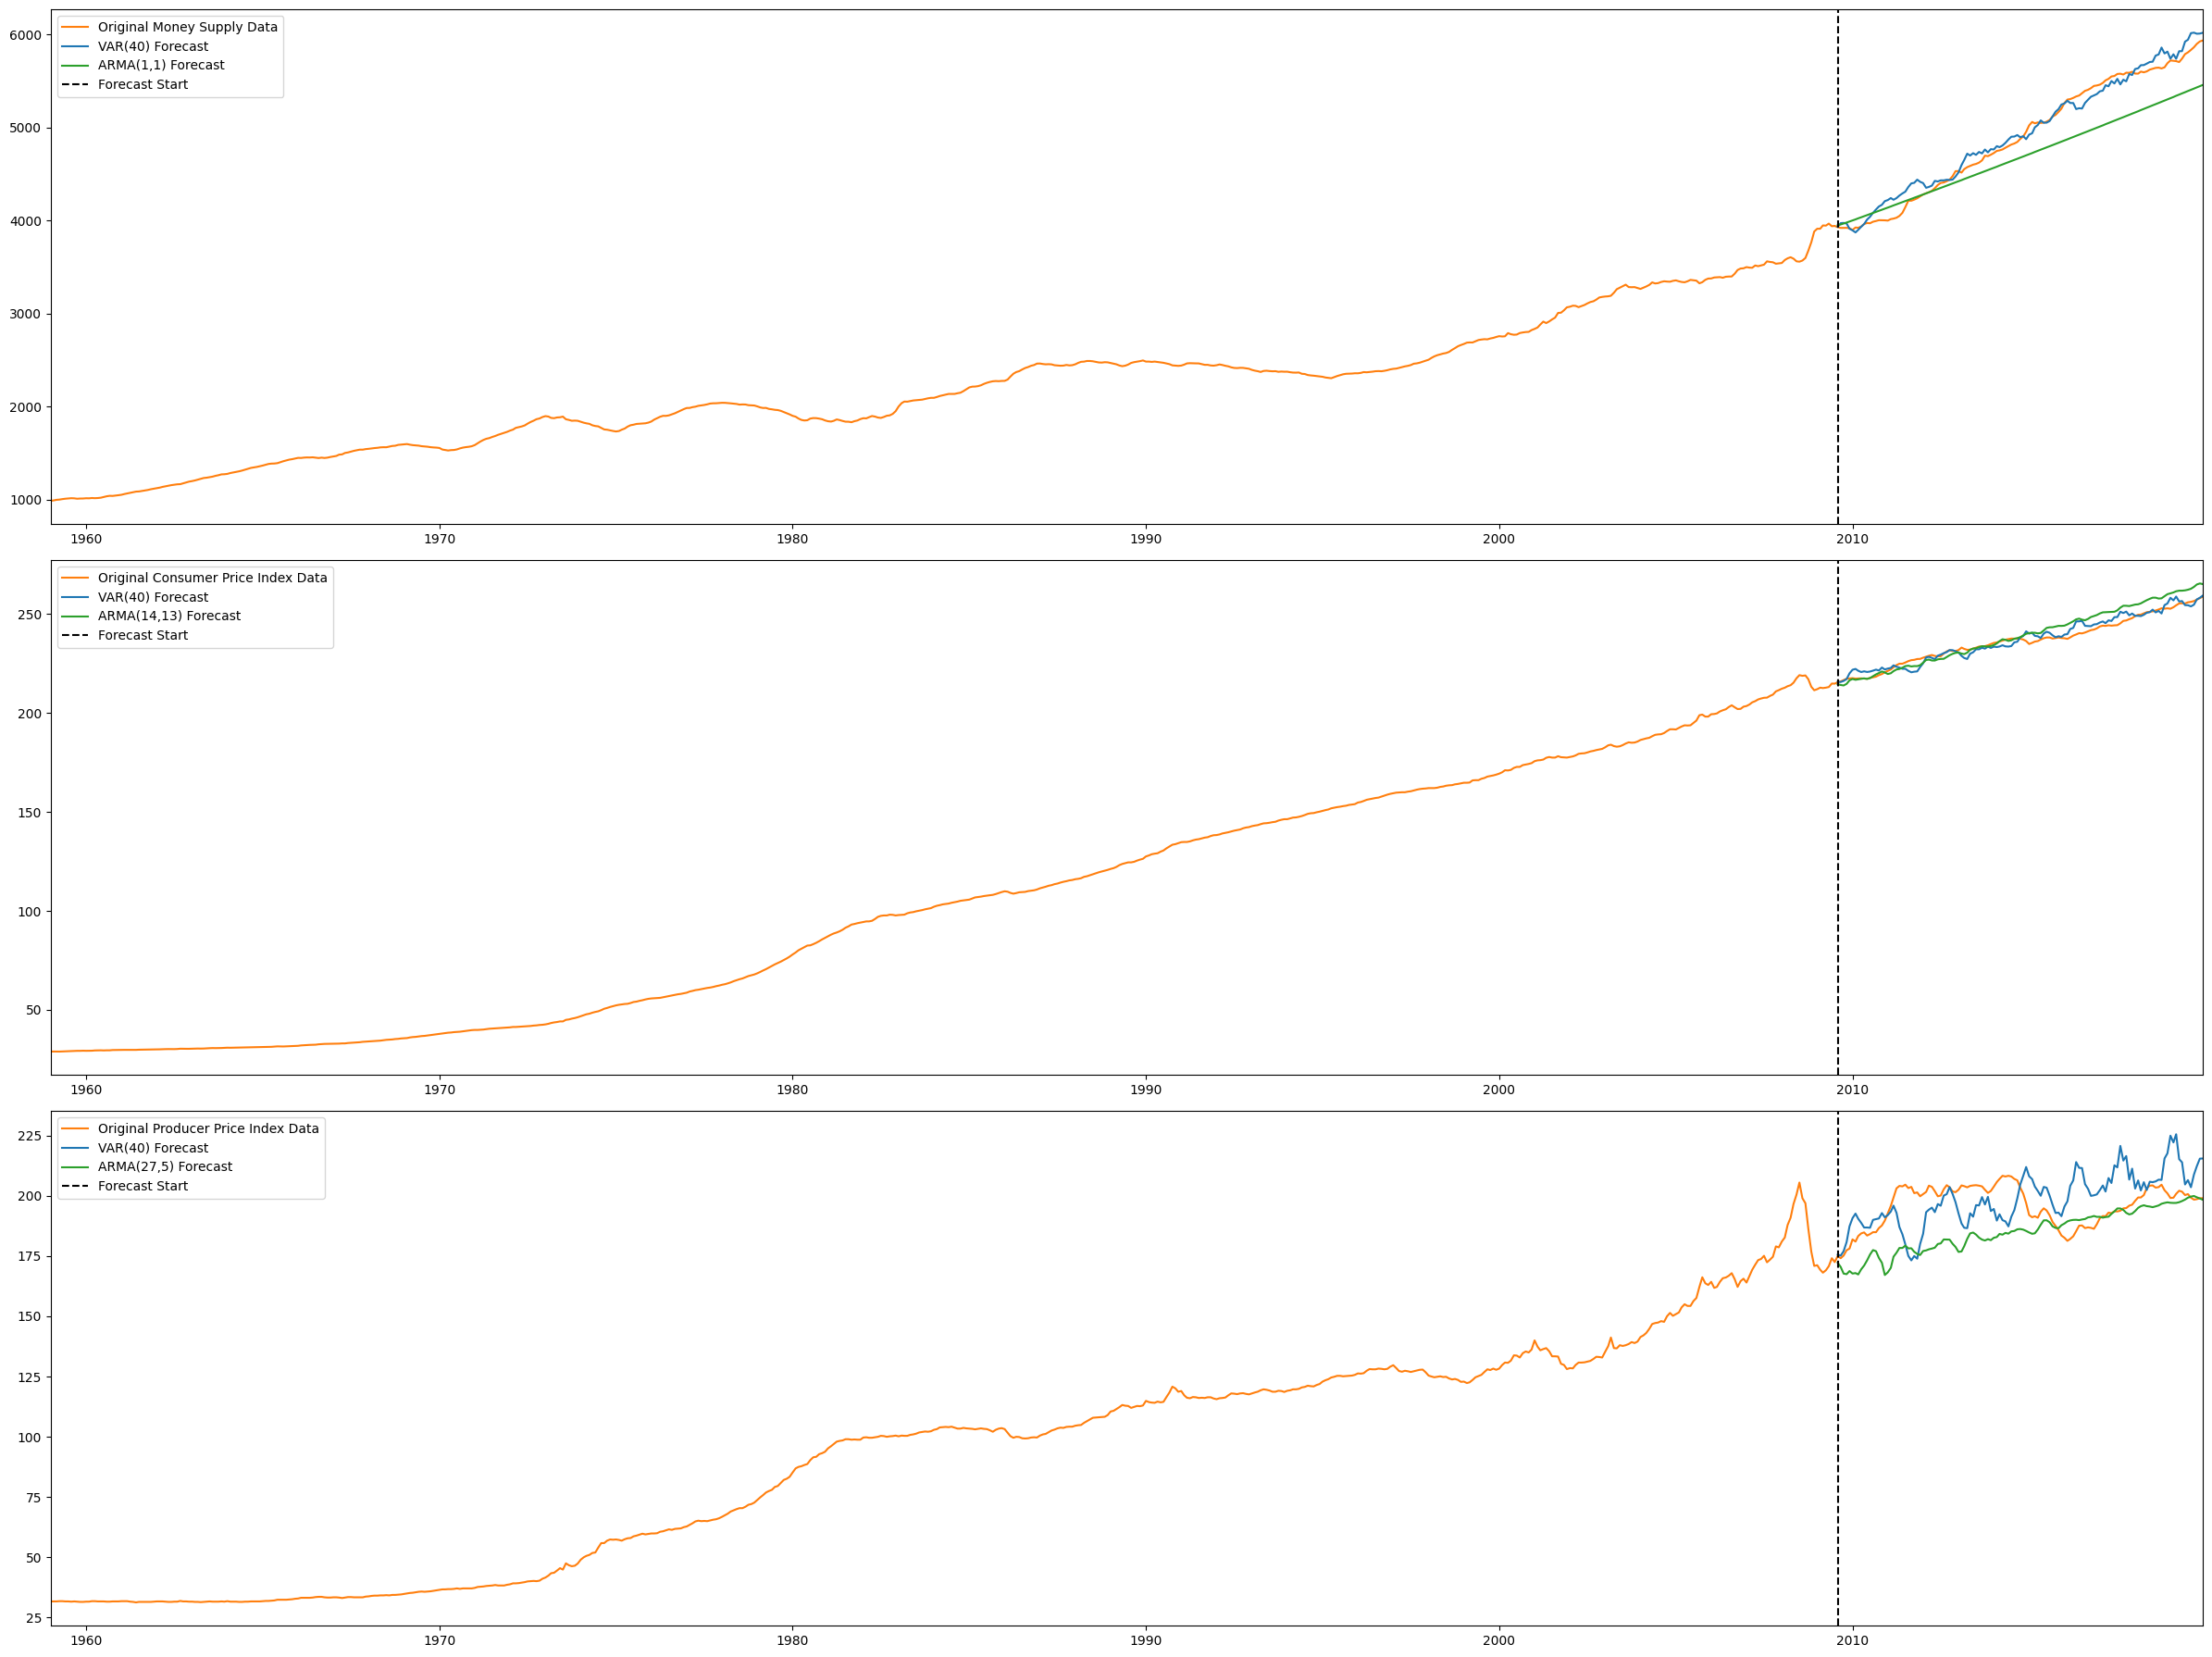

In [54]:
# Get parameters
p = best_model["p"]
Z = best_model["Z"]
B = best_model["B"]
v = best_model["v"]
A = best_model["A"]
# Get the most recent values
lags = [Y[:,-t] for t in range(1, p + 1)][::-1]
# Make predictions
fcast_standard = get_predictions_VAR(lags, v, A, n_test)
fcasts_VAR = {}
MSEs_VAR = {}

# Put predictions in the scale of the original data
# and plot predictions and get MSEs
fig, axs = plt.subplots(K, 1, figsize=(24, 18), sharex = True)
for j in range(len(names)):
  name = names[j]
  fcasts_VAR[name] = fcast_standard[j,:]*sds[name]
  fcasts_VAR[name] = undifference(name, fcasts_VAR, n_test)

  fcast_VAR = fcasts_VAR[name]
  fcast_ARMA = fcasts_ARMA[name]

  MSEs_VAR[name] = np.mean((fcast_VAR - test_df[name].values)**2)

  ax = axs[j]
  ax.plot(data.index, data[name].values, label = f"Original {name} Data", color = "C1")
  ax.plot(data.index[-n_test:], fcast_VAR, label = f"VAR({p}) Forecast", color = "C0")
  ax.plot(data.index[-n_test:], fcast_ARMA, label = f"ARMA({ARMA_models[name]["param"][0]},{ARMA_models[name]["param"][2]}) Forecast", color = "C2")
  ax.axvline(x = data.index[-n_test], color = "black", linestyle = "--", label = "Forecast Start")
  ax.set_xlim(data.index[0], data.index[-1])
  ax.tick_params(labelbottom = True)
  ax.legend(loc = "upper left")
plt.tight_layout()
plt.show()

The benefit which VAR is providing over independent ARMA modeling is very clear, especially in the money supply time series. Now I will show the mean squared prediction errors for each time series and the overall mean squared prediction error.

In [18]:
print(f"Independant ARMA Model MSEs:")
for name in names:
    print(f"MSE for {name} {MSEs_ARMA[name]:.2f}")
print(f"\nIndependant Model Overall MSE: {np.mean(list(MSEs_ARMA.values())):.2f}")

print(f"\n\nVAR MSEs:")
for name in names:
    print(f"MSE for {name} {MSEs_VAR[name]:.2f}")
print(f"\nVAR Overall MSE: {np.mean(list(MSEs_VAR.values())):.2f}")

Independant ARMA Model MSEs:
MSE for Money Supply 86848.55
MSE for Consumer Price Index 21.60
MSE for Producer Price Index 229.68

Independant Model Overall MSE: 29033.28


VAR MSEs:
MSE for Money Supply 10369.81
MSE for Consumer Price Index 8.28
MSE for Producer Price Index 183.16

VAR Overall MSE: 3520.42


VAR clearly does much better in every time series. ARMA does the worst in the money supply time series so I will show what the overall mean squared prediction error is if we exclude that series.

In [19]:
print(f"Independant Model Overall MSE Excluding Money Supply: {np.mean([MSEs_ARMA[name] for name in names if name != "Money Supply"]):.2f}")
print(f"VAR Overall MSE Excluding Money Supply: {np.mean([MSEs_VAR[name] for name in names if name != "Money Supply"]):.2f}")

Independant Model Overall MSE Excluding Money Supply: 125.64
VAR Overall MSE Excluding Money Supply: 95.72


Even ignoring the worst performing series for ARMA this is a very significant improvement by VAR.

## Validating That My Implementation Worked Properly

I will now compare my VAR results with those from the statsmodels package.

In [35]:
from statsmodels.tsa.api import VAR

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sm_VAR = VAR(train).fit(p)

print(sm_VAR.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, May, 2025
Time:                     19:59:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.248851
Nobs:                     565.000    HQIC:                  -1.44991
Log likelihood:          -1325.27    FPE:                  0.0806803
AIC:                     -2.53746    Det(Omega_mle):       0.0450755
--------------------------------------------------------------------
Results for equation Money Supply
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -0.065380         0.047002           -1.391           0.164
L1.Money Supply                 -0.538011         0.061180           -8.794           0.000
L1.Consum

There are a lot of things to look at here but checking a few values for example the constant on each series we see that the estimates from statsmodels are the same as mine. Now I will show the predictions from mine and the predictions from statsmodels on the same graph.

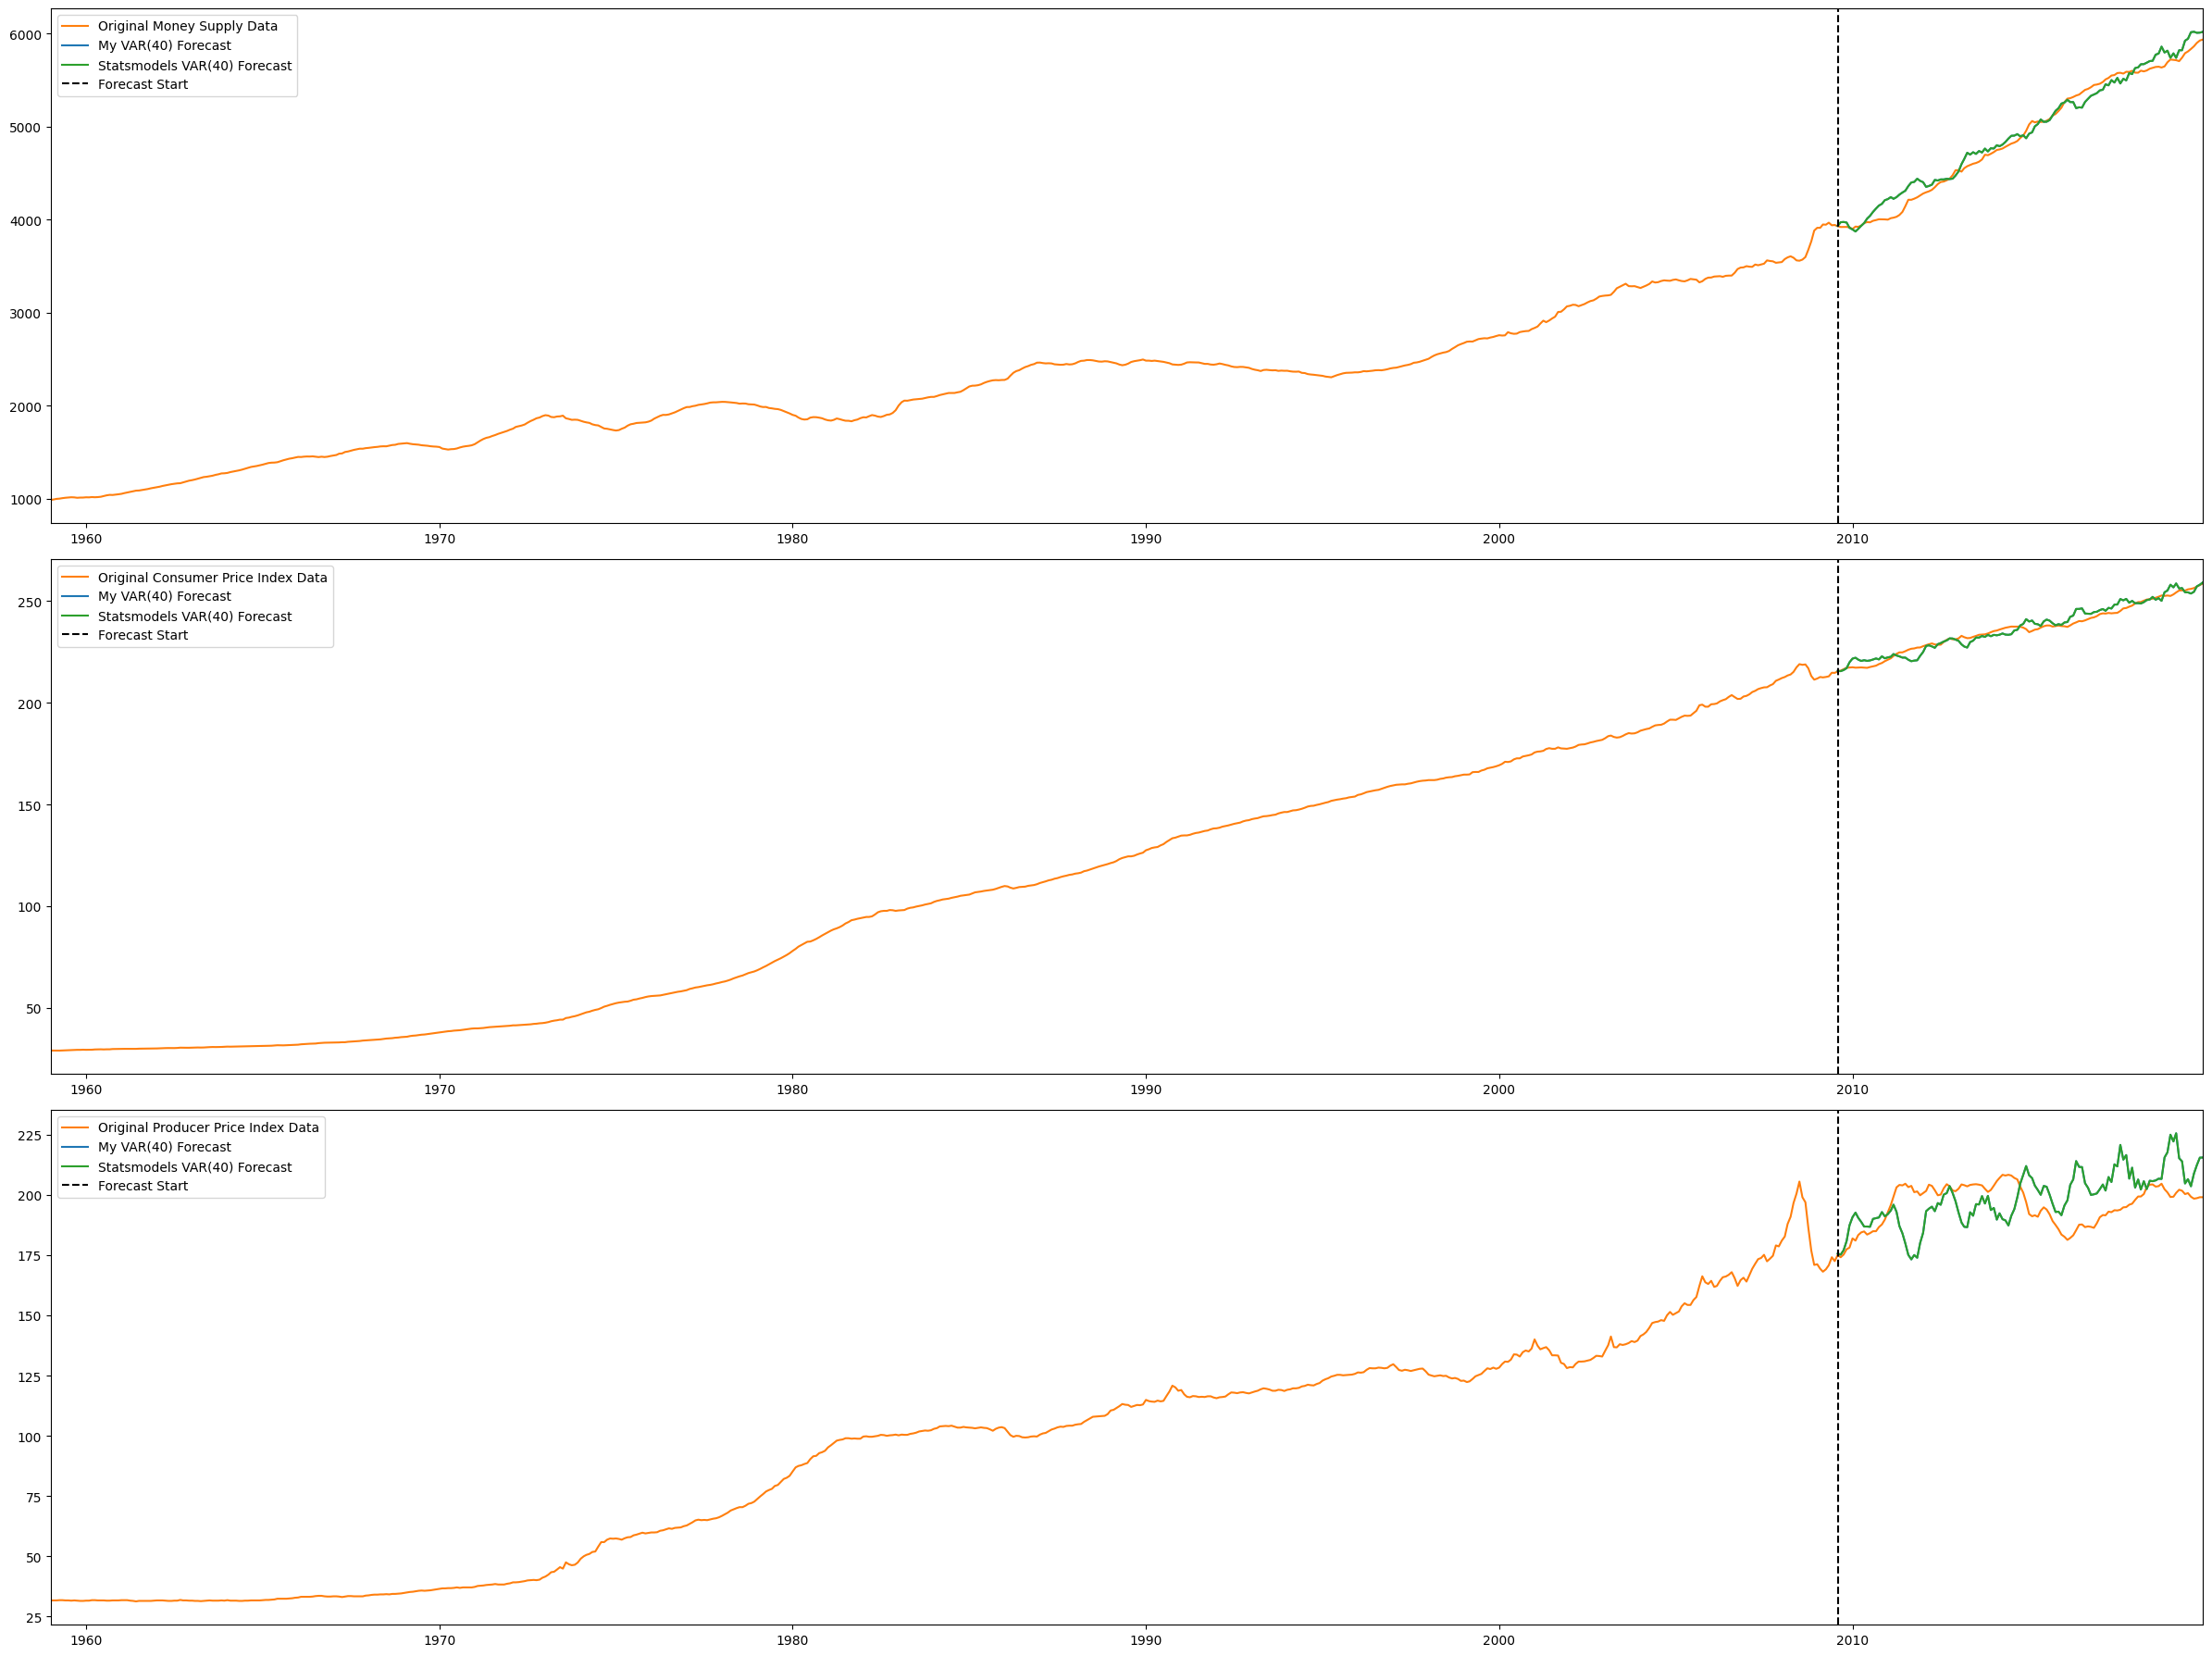

In [55]:
fcasts_standard = sm_VAR.forecast(train[-p:].values, n_test).T
fcasts_sm_VAR = {}
MSEs_sm_VAR = {}

fig, axs = plt.subplots(K, 1, figsize=(24, 18), sharex = True)
for j in range(len(names)):
  name = names[j]
  fcasts_sm_VAR[name] = fcasts_standard[j,:]*sds[name]
  fcasts_sm_VAR[name] = undifference(name, fcasts_sm_VAR, n_test)

  fcast_sm_VAR = fcasts_sm_VAR[name]
  fcast_VAR = fcasts_VAR[name]

  MSEs_sm_VAR[name] = np.mean((fcast_sm_VAR - test_df[name].values)**2)

  ax = axs[j]
  ax.plot(data.index, data[name].values, label = f"Original {name} Data", color = "C1")
  ax.plot(data.index[-n_test:], fcast_VAR, label = f"My VAR({p}) Forecast", color = "C0")
  ax.plot(data.index[-n_test:], fcast_sm_VAR, label = f"Statsmodels VAR({p}) Forecast", color = "C2")
  ax.axvline(x = data.index[-n_test], color = "black", linestyle = "--", label = "Forecast Start")
  ax.set_xlim(data.index[0], data.index[-1])
  ax.tick_params(labelbottom = True)
  ax.legend(loc = "upper left")
plt.tight_layout()
plt.show()

Clearly they are perfectly overlapping. There is no difference between the predictions which shows I have successfully implemented VAR from scratch. It is not necessary since I have just shown that the forecasts are the same but I have also provided the mean squared prediction errors below as well.

In [34]:
print(f"My VAR MSEs:")
for name in names:
    print(f"MSE for {name} {MSEs_VAR[name]:.2f}")
print(f"\nMy VAR Overall MSE: {np.mean(list(MSEs_VAR.values())):.2f}")

print(f"\n\nStatsmodels VAR MSEs:")
for name in names:
    print(f"MSE for {name} {MSEs_sm_VAR[name]:.2f}")
print(f"\nStatsmodels VAR Overall MSE: {np.mean(list(MSEs_sm_VAR.values())):.2f}")

My VAR MSEs:
MSE for Money Supply 10369.81
MSE for Consumer Price Index 8.28
MSE for Producer Price Index 183.16

My VAR Overall MSE: 3520.42


Statsmodels VAR MSEs:
MSE for Money Supply 10369.81
MSE for Consumer Price Index 8.28
MSE for Producer Price Index 183.16

Statsmodels VAR Overall MSE: 3520.42


Again, they are exactly the same. I have properly implemented VAR.

## Why VAR is Performing Better

The reason VAR performs so much better is precisely because of the interrelation of these time series. Looking at the plots of the time series you can clearly see that a change in one time series corresponds with a change in the others. When using independent component modeling with ARMA this important interrelation is not captured since we are only ever looking at one time series. However, VAR estimates all time series jointly and is able to capture these interrelations and improve its performance. An important tool for examining the structure of the system is the cross correlation function (CCF).

The CCF matrix $R(h)$ has its entry at $i,j$ defined to be $\rho_{ij}(h) =\text{Corr}(y_{i,t},y_{j,t-h})$ similar to the ACF for univariate series. In fact if $i = j$ then the CCF is just the ACF. Below I implement the sample CCF from scratch and plot the CCF for the differenced data in the macroeconomic system I have been using.

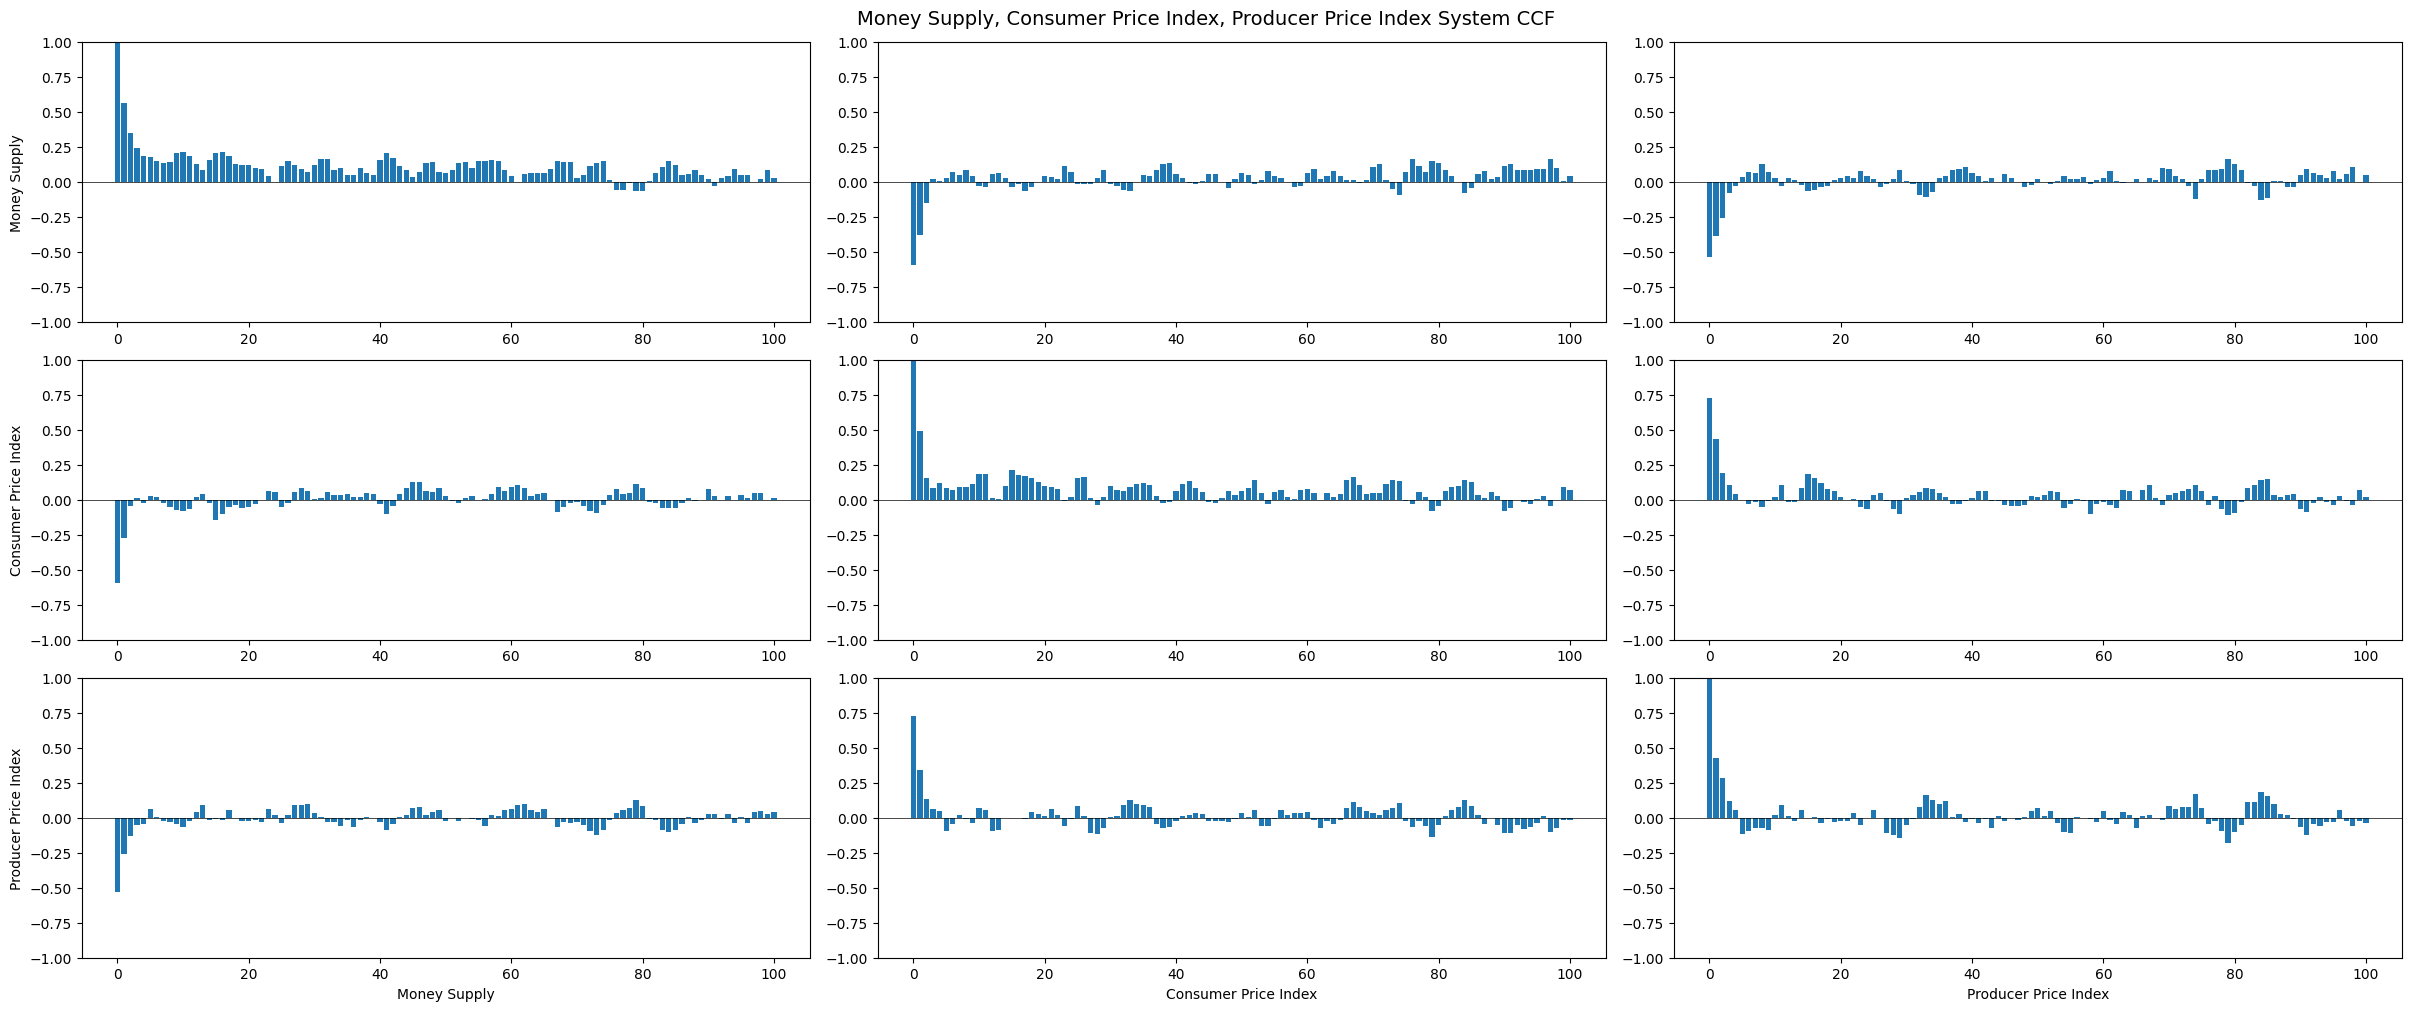

In [ ]:
def ccf(x, y, lags):
    # Standardize
    x = (x - np.mean(x))/np.std(x)
    y = (y - np.mean(y))/np.std(y)
    
    ccf_vals = []
    lags = range(0, lags + 1)
    for lag in lags:
        # Compute cross correlation
        if lag == 0:
            corr = np.corrcoef(x, y)[0, 1]
        else:
            corr = np.corrcoef(x[lag:], y[:-lag])[0, 1]
        ccf_vals.append(corr)
    return(np.array(ccf_vals), lags)


fig, axes = plt.subplots(K, K, figsize = (24, 10), constrained_layout = True)
for i, name1 in enumerate(names):
    for j, name2 in enumerate(names):
        ax = axes[i, j]
        corr, h = ccf(data.diff(1).dropna()[name1].values, data.diff(1).dropna()[name2].values, lags = 100)
        ax.bar(h, corr)
        ax.axhline(0, color = "black", linewidth = 0.5)
        ax.set_ylim(-1, 1)
        if i == K - 1:
            ax.set_xlabel(name2, fontsize = 10)
        else:
            ax.set_xlabel("")
        if j == 0:
            ax.set_ylabel(name1, fontsize = 10)
        else:
            ax.set_ylabel("")
fig.suptitle("Money Supply, Consumer Price Index, Producer Price Index System CCF", fontsize = 14)
plt.show()

The plots on the diagonals are indeed the ACF for each time series but importantly notice that the cross correlation for each of the series is rather significant for the low lags. It is important to note again that these are the CCFs for the once differenced data so these plots show how changes in one variable are correlated with changes in the others. This is different from the standard interpretation which is usually how the level of one variable is correlated with the level of the others.

Still, this confirms the fact that these time series are highly interrelated and explains why VAR performs much better compared to independent component modeling with ARMA. By examining the plots we see that changes in money supply are negatively correlated with changes in consumer price index in the short run but are somewhat positively correlated with changes in consumer price index in the long run. Also it seems that changes in money supply are negatively correlated with changes in producer price index in the short run but slightly positively correlated with changes in producer price index in the long run. Finally, it seems like changes in producer price index are positively correlated with changes in consumer price index in the short run and slightly positively correlated with changes in consumer price index in the long run.

Another useful tool for examining VAR models are impulse response functions (IRFs) which show how a shock from one variable affects the others over time. I will not implement IRF from scratch but will show the results from the statsmodels package.

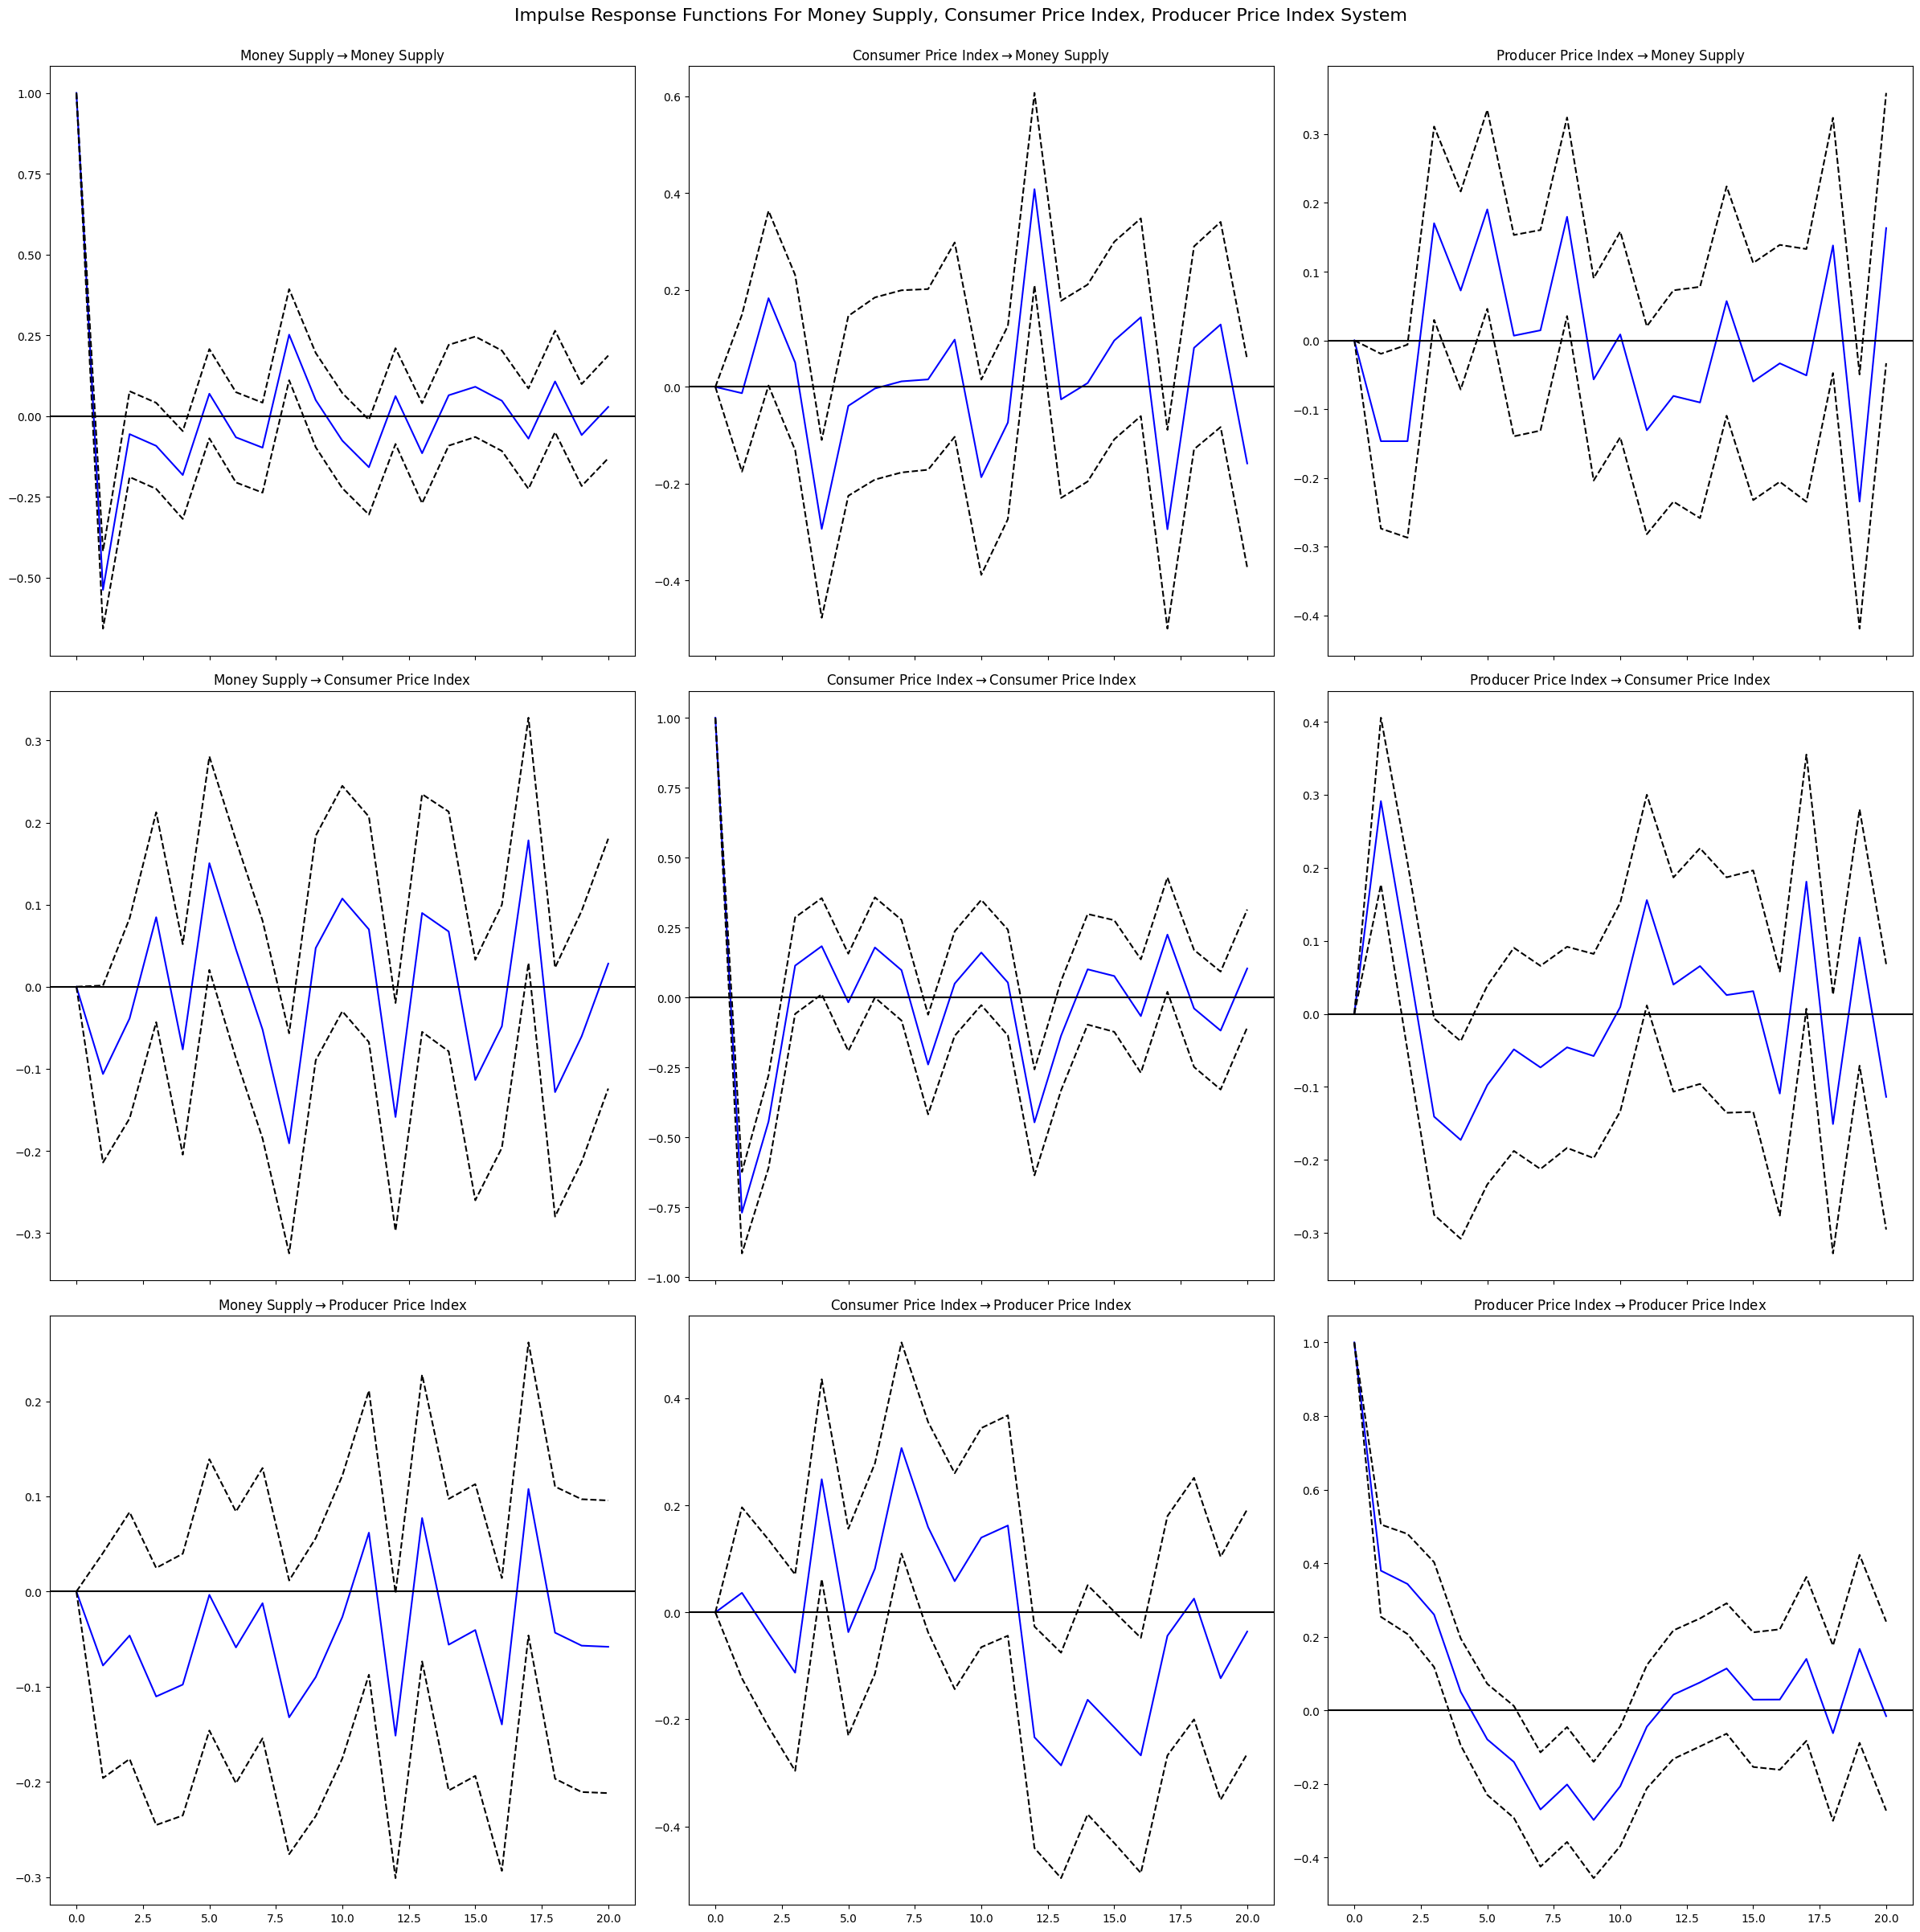

In [49]:
IRF = sm_VAR.irf(20)
fig = IRF.plot(orth = False)
fig.set_size_inches(24, 24)
plt.tight_layout()
fig.suptitle("Impulse Response Functions For Money Supply, Consumer Price Index, Producer Price Index System", fontsize = 16, y = 1)
plt.show()

When looking at IRFs we are primarily interested in the plots not on the main diagonal since those show the interaction of the time series. Note that the VAR model was fit to twice differenced money supply data, twice differenced consumer price index data, and once differenced producer price index data. These plots do not have much meaningful interpretation in terms of the undifferenced variables so I will not go very into depth about them. The reason they have no meaningful interpretation for each of the variables is that a sharp spike in one of the double differenced data represents a sharp spike in the acceleration of the undifferenced variable and a sharp spike in single differenced data represents a sharp spike in the rate of change of the undifferenced variable. It is not really possible to invert the differencing effects to obtain meaningful effects without simply fitting a VAR model to the undifferenced data which would be ill-advised since the undifferenced data is non-stationary. The main takeaways in this post analysis are the results from the CCF, the IRF is not very relevant.

The result for this specific dataset generalizes to other datasets where the component time series are highly interrelated, VAR is able to outperform independent component ARMA modeling since it can capture those interrelations and improve forecasts. In datasets with very low or no interrelation I do not forsee VAR performing better, in fact it might perform worse since it needs to estimate more parameters than each ARMA model does on its own which could lead to overfitting.

## References

[1] $\text{L}\"{\text{u}}\text{tkepohl}$, H. (2005). New introduction to multiple time series analysis. Springer Science & Business Media.